# **Capstone Project II: Telco Customer Churn Prediction**
**by Thariq Ahmad Baihaqi Adinegara**

## **1. Project Introduction**

Dalam perusahaan di industri telekomunikasi, atau berikutnya disebut *telco*, umum digunakan layanan berbasis langganan atau *subscription*. Layanan ini memiliki beberapa keunggulan, antara lain:
- **Pendapatan yang Dapat Diprediksi:** Memberikan aliran pendapatan yang stabil dan berulang, memungkinkan perencanaan keuangan yang lebih baik dan stabilitas.  
- **Loyalitas dan Retensi Pelanggan:** Membangun hubungan pelanggan jangka panjang, yang mengarah pada peningkatan loyalitas dan *customer life time  value* (CLTV) yang lebih tinggi.
- **Biaya Akuisisi Pelanggan yang Lebih Rendah:** Berfokus pada retensi pelanggan existing, yang seringkali lebih murah daripada terus-menerus mengakuisisi pelanggan baru.

Namun di sisi lain, model bisnis subscription memiliki beberapa tantangan. Salah satunya adalah kondisi dimana pelanggan membatalkan langganannya dari suatu layanan disebut dengan *churn*. Berikut ini adalah beberapa tantangan dari model subscription:
- **Tingkat Churn Tinggi:** Risiko signifikan, karena pelanggan mungkin membatalkan langganan akibat penurunan nilai, perubahan kebutuhan, atau kelelahan berlangganan, yang mengakibatkan kehilangan pendapatan.
- **Menjaga Nilai:** Bisnis harus terus memberikan nilai untuk membenarkan biaya langganan berkelanjutan, yang dapat menantang, terutama untuk produk yang nilai utamanya adalah kesederhanaan.
- **Ketidakrelaan Pelanggan terhadap Kontrak:** Banyak pelanggan enggan berkomitmen pada kontrak jangka panjang, bahkan untuk layanan yang mereka inginkan, yang dapat menimbulkan gesekan dalam proses pendaftaran.

Dengan mengumpulkan data yang relevan, perusahaan dapat menggunakan model machine learning untuk memprediksi kemungkinan churn pelanggan, lalu mengambil tindakan proaktif guna mempertahankan pelanggan tersebut.

Dalam notebook ini akan diulas seluruh tahapan proyek, mulai dari perumusan masalah bisnis, pembersihan data, feature engineering, pembangunan model, evaluasi, hingga penarikan kesimpulan dan pemberian rekomendasi bisnis.



## **2. Business Problem**
### 2.1. Latar Belakang Masalah
Di industri telekomunikasi yang sangat kompetitif, mempertahankan pelanggan yang sudah ada jauh lebih hemat biaya daripada mengakuisisi pelanggan baru. Pelanggan yang berhenti berlangganan (churn) secara langsung mengurangi pendapatan dan dapat merusak reputasi perusahaan. Oleh karena itu, perusahaan perlu mengidentifikasi pelanggan yang berisiko pergi sebelum mereka benar-benar melakukannya.

### 2.2. Stakeholder
Model ini dirancang untuk digunakan oleh Tim Retensi Pelanggan dan Tim Pemasaran. Tim Retensi akan menggunakan hasil prediksi untuk menjangkau pelanggan berisiko tinggi dengan penawaran khusus, sementara Tim Pemasaran dapat menggunakan wawasan dari model untuk merancang *campaign* yang lebih efektif.

### 2.3. Tujuan Proyek
Tujuan utama dari proyek ini adalah:

**Membangun sebuah model klasifikasi yang dapat memprediksi secara akurat pelanggan mana yang memiliki kemungkinan tinggi untuk churn.**

Dengan identifikasi dini, perusahaan dapat meluncurkan kampanye retensi yang proaktif dan tertarget (seperti diskon loyalitas, peningkatan layanan, atau panggilan personal) untuk mencegah pelanggan tersebut pergi, sehingga dapat menekan churn rate dan mengoptimalkan profitabilitas.

## **3. Analytic Approach**
Untuk mencapai tujuan tersebut, masalah ini akan diselesaikan dengan pendekatan pemodelan klasifikasi biner. Model akan dilatih menggunakan data historis pelanggan untuk mempelajari pola-pola yang membedakan antara pelanggan yang tetap setia dan yang berhenti berlangganan.

- **Target Variable:** Kolom Churn akan menjadi variabel target kita.
- **Prediction:** Model akan memprediksi apakah seorang pelanggan akan churn ('Yes') atau tidak ('No').
- **Output:** Hasil akhir dari model adalah probabilitas seorang pelanggan untuk churn, yang dapat digunakan untuk membuat segmentasi pelanggan berdasarkan tingkat risikonya.

## **4. Data Loading & Understanding**
Pada tahap ini, dataset Telco Customer Churn dimuat ke dalam notebook dan akan dilakukan beberapa pemeriksaan dasar untuk memahami struktur dan konten data. Diketahui *features* dari dataset yang ada adalah sebagai berikut:
1. Dependents: Whether the customer has dependents or not.
2. Tenure: Number of months the customer has stayed with the company.
3. OnlineSecurity: Whether the customer has online security or not.
4. OnlineBackup: Whether the customer has online backup or not.
5. InternetService: Whether the client is subscribed to Internet service.
6. DeviceProtection: Whether the client has device protection or not.
7. TechSupport: Whether the client has tech support or not
8. Contract: Type of contract according to duration.
9. PaperlessBilling: Bills issued in paperless form.
10. MonthlyCharges: Amount of charge for service on monthly bases.
11. Churn: Whether the customer churns or not.


### 4.1. Import Libraries
Library yang diperlukan untuk keseluruhan proyek ini dimuat, mulai dari keperluan manipulasi data, visualisasi, preprocessing, pemodelan, hingga evaluasi.

In [ ]:
# Analisis data dasar
import pandas as pd
import numpy as np

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Menyimpan Model
import pickle

# Tambahan
import warnings
warnings.filterwarnings('ignore')

print("Semua library berhasil di-import!")


Semua library berhasil di-import!


### 4.3. Memuat Dataset
Selanjutnya, dataset dimuat dalam bentuk CSV ke dalam bentuk DataFrame Pandas.


In [ ]:
# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/purwadhika ai engineering/modul 2: ml/capstone modul 2/Telco Customer Churn/data_telco_customer_churn.csv')

# Tampilkan 5 baris pertama dari data
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [ ]:
# Tampilkan 5 baris terakhir dari data
df.tail()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes
4929,Yes,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No


### 4.4. Inspeksi, Eksplorasi, dan Visualisasi Data
Sebagai awalan, akan dilakukan inspeksi dasar untuk memahami data lebih dalam:
1. `info()`: Untuk melihat ringkasan DataFrame, termasuk tipe data setiap kolom dan jumlah nilai non-null.
2. `.describe()`: Untuk mendapatkan ringkasan statistik dari kolom-kolom numerik.
3. `.shape`: Untuk melihat dimensi data (jumlah baris dan kolom).
4. `isnull().sum()`: Untuk menjumlah data kosong.
5. `duplicated().sum()`: Untuk menjumlah data duplikat.

In [ ]:
# Melihat informasi umum dataset
print("Informasi Dataset:")
print(df.info())

# Melihat ringkasan statistik
print("\nRingkasan Statistik:")
print(df.describe())

# Melihat dimensi dataset
print("\nDimensi Dataset:")
print(df.shape)

# Menghitung jumlah null
print("\nJumlah Null:")
print(df.isnull().sum())

# Menghitung jumlah duplikat
print("\nJumlah Duplikat:")
print(df.duplicated().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB
None

Ringkasan Statistik:
            tenure  MonthlyCharges
count  4930.000000     4930.000000
mean     32.401217       64.883032
std      24.501193       29.923960
min       0.000000       18.8000

Data tidak memiliki missing values, pertanda baik yang ditunjukkan oleh non-null count sebanyak seluruh barisnya (4930). Tipe data untuk numeric dan categoricals juga sudah sesuai.

Terdapat beberapa poin yang perlu diperhatikan. Pertama, data objects sepertinya terlihat tidak sepenuhnya konsisten sehingga perlu diperiksa satu persatu. Kemudian, data tenure memiliki nilai minimum 0, yang mana apakah mungkin ini pelanggan yang langsung churn atau salah input. Data duplikat juga perlu dicek.

In [ ]:
# Menampilkan data yang duplikat
print("\nData Duplikat:")
display(df[df.duplicated()])


Data Duplikat:


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


Semirip-miripnya baris, tetap ada perbedaannya, oleh karena itu data yang mirip ini sebaiknya tidak dihapus. Berikutnya, memeriksa baris dengan tenure = 0.

In [ ]:
print("Baris dengan tenure = 0")
display(df[df['tenure'] == 0])

Baris dengan tenure = 0


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


Baris dengan tenure = 0 tidak ada yang churn. Mereka semua ada di dalam kontrak 2 tahunan, mungkin mereka adalah pelanggan-pelanggan baru. Berikutnya akan ditinjau lebih detail data untuk tiap kolom. Pertama, untuk data categoricals terlebih dahulu, digunakan `sns.countplot` untuk visualisasi sederhana dan memeriksa konsistensi penulisan datanya.

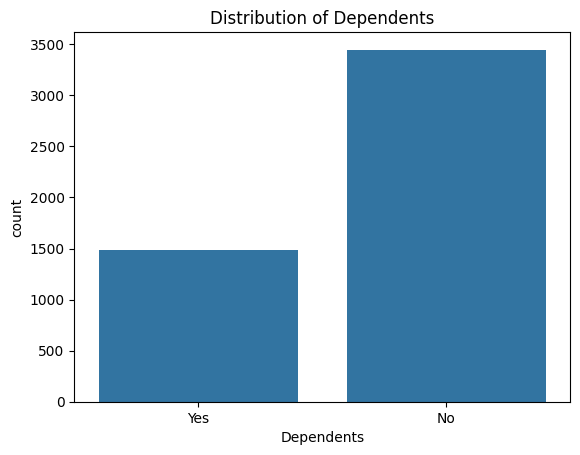

In [ ]:
sns.countplot(data=df, x='Dependents')
plt.title('Distribution of Dependents')
plt.show()

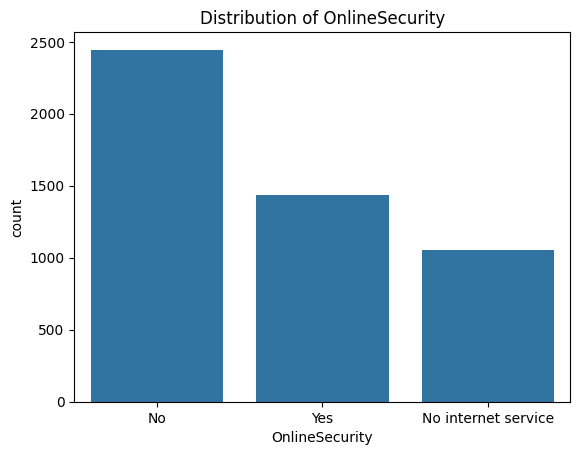

In [ ]:
sns.countplot(data=df, x='OnlineSecurity')
plt.title('Distribution of OnlineSecurity')
plt.show()

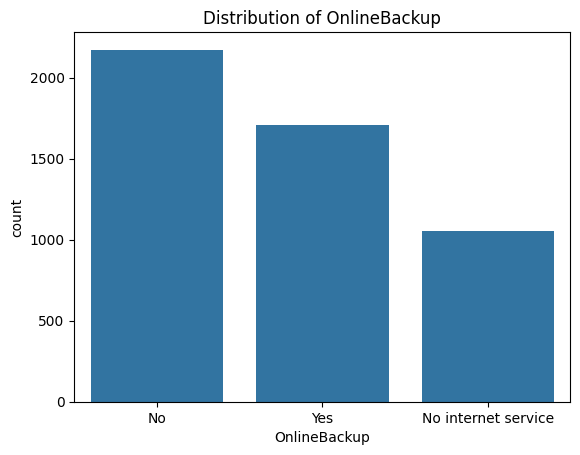

In [ ]:
sns.countplot(data=df, x='OnlineBackup')
plt.title('Distribution of OnlineBackup')
plt.show()

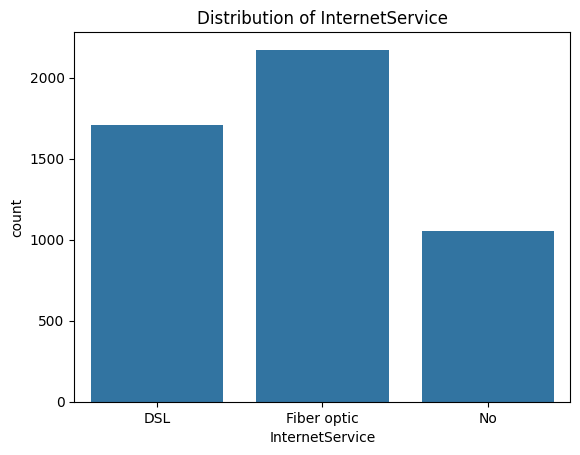

In [ ]:
sns.countplot(data=df, x='InternetService')
plt.title('Distribution of InternetService')
plt.show()

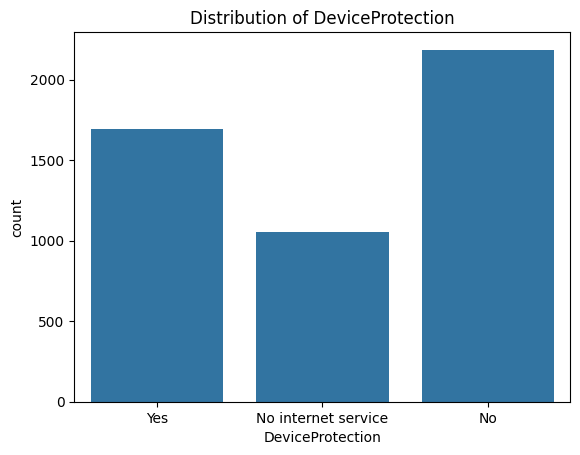

In [ ]:
sns.countplot(data=df, x='DeviceProtection')
plt.title('Distribution of DeviceProtection')
plt.show()

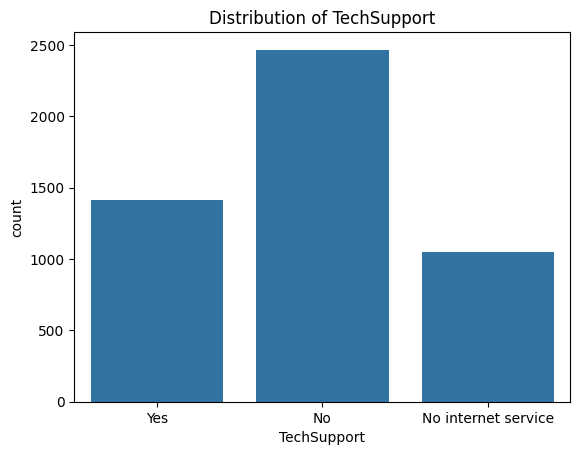

In [ ]:
sns.countplot(data=df, x='TechSupport')
plt.title('Distribution of TechSupport')
plt.show()

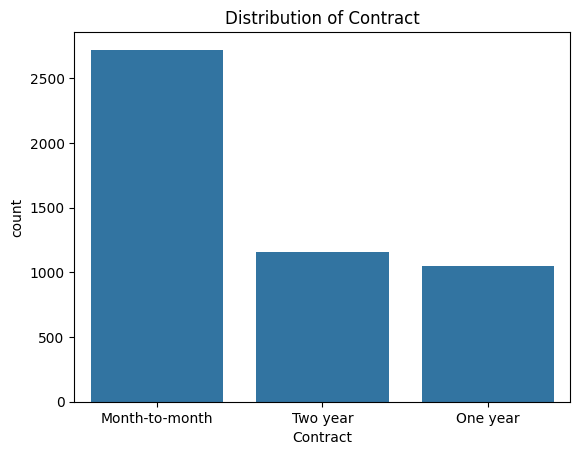

In [ ]:
sns.countplot(data=df, x='Contract')
plt.title('Distribution of Contract')
plt.show()

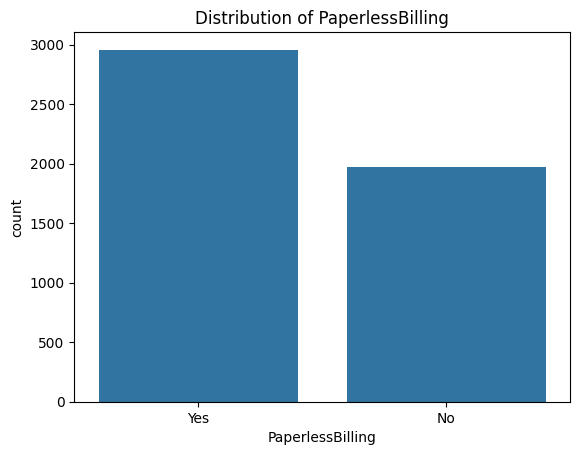

In [ ]:
sns.countplot(data=df, x='PaperlessBilling')
plt.title('Distribution of PaperlessBilling')
plt.show()

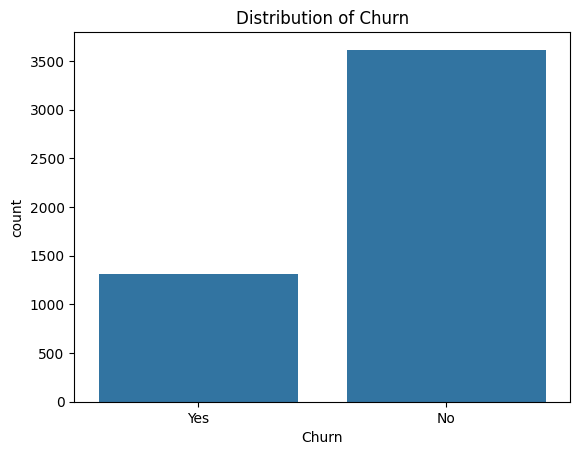

In [ ]:
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

Data categoricals sudah konsisten seluruhnya, tidak ada anomali ataupun typo. Berikutnya akan ditinjau korelasi antar fitur. Churn adalah kondisi dimana pelanggan membatalkan layanan, maka fitur pertama yang dapat diperiksa korelasinya dengan **churn**, adalah fitur **Contract**. Berikut ini adalah grafik `countplot` dengan hue **Contract**, untuk memperlihatkan distribusi churn berdasarkan tipe kontraknya.

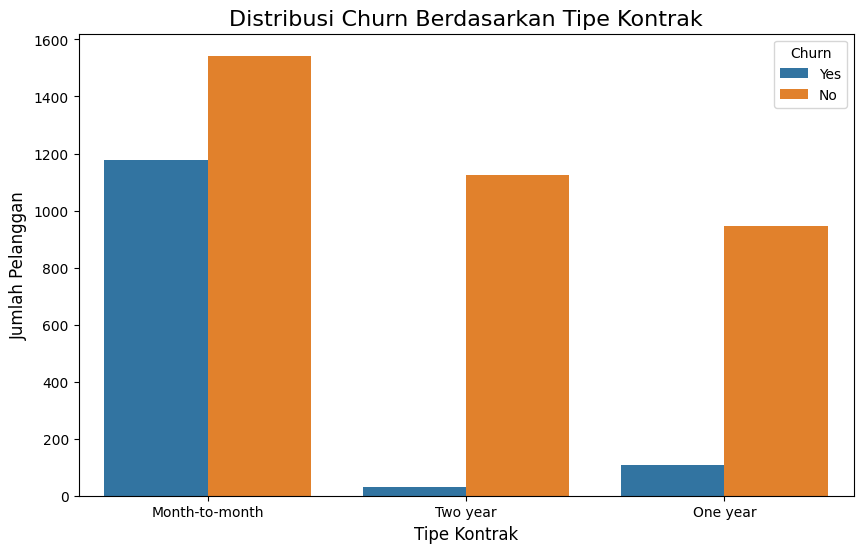

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Distribusi Churn Berdasarkan Tipe Kontrak', fontsize=16)
plt.xlabel('Tipe Kontrak', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.legend(title='Churn')
plt.show()

Pelanggan dengan tipe kontrak 1 dan 2 tahunan minim terjadi churn. Pelanggan dengan tipe kontrak bulanan harus lebih dijaga karena mereka rentan churn. Untuk melihat secara cepat korelasi antar fitur dengan churn, dibuat grafik gabungan dengan `plt.subplot` untuk grafik `sns.countplot` tiap kolom kategorikal dengan `hue='Churn'`.

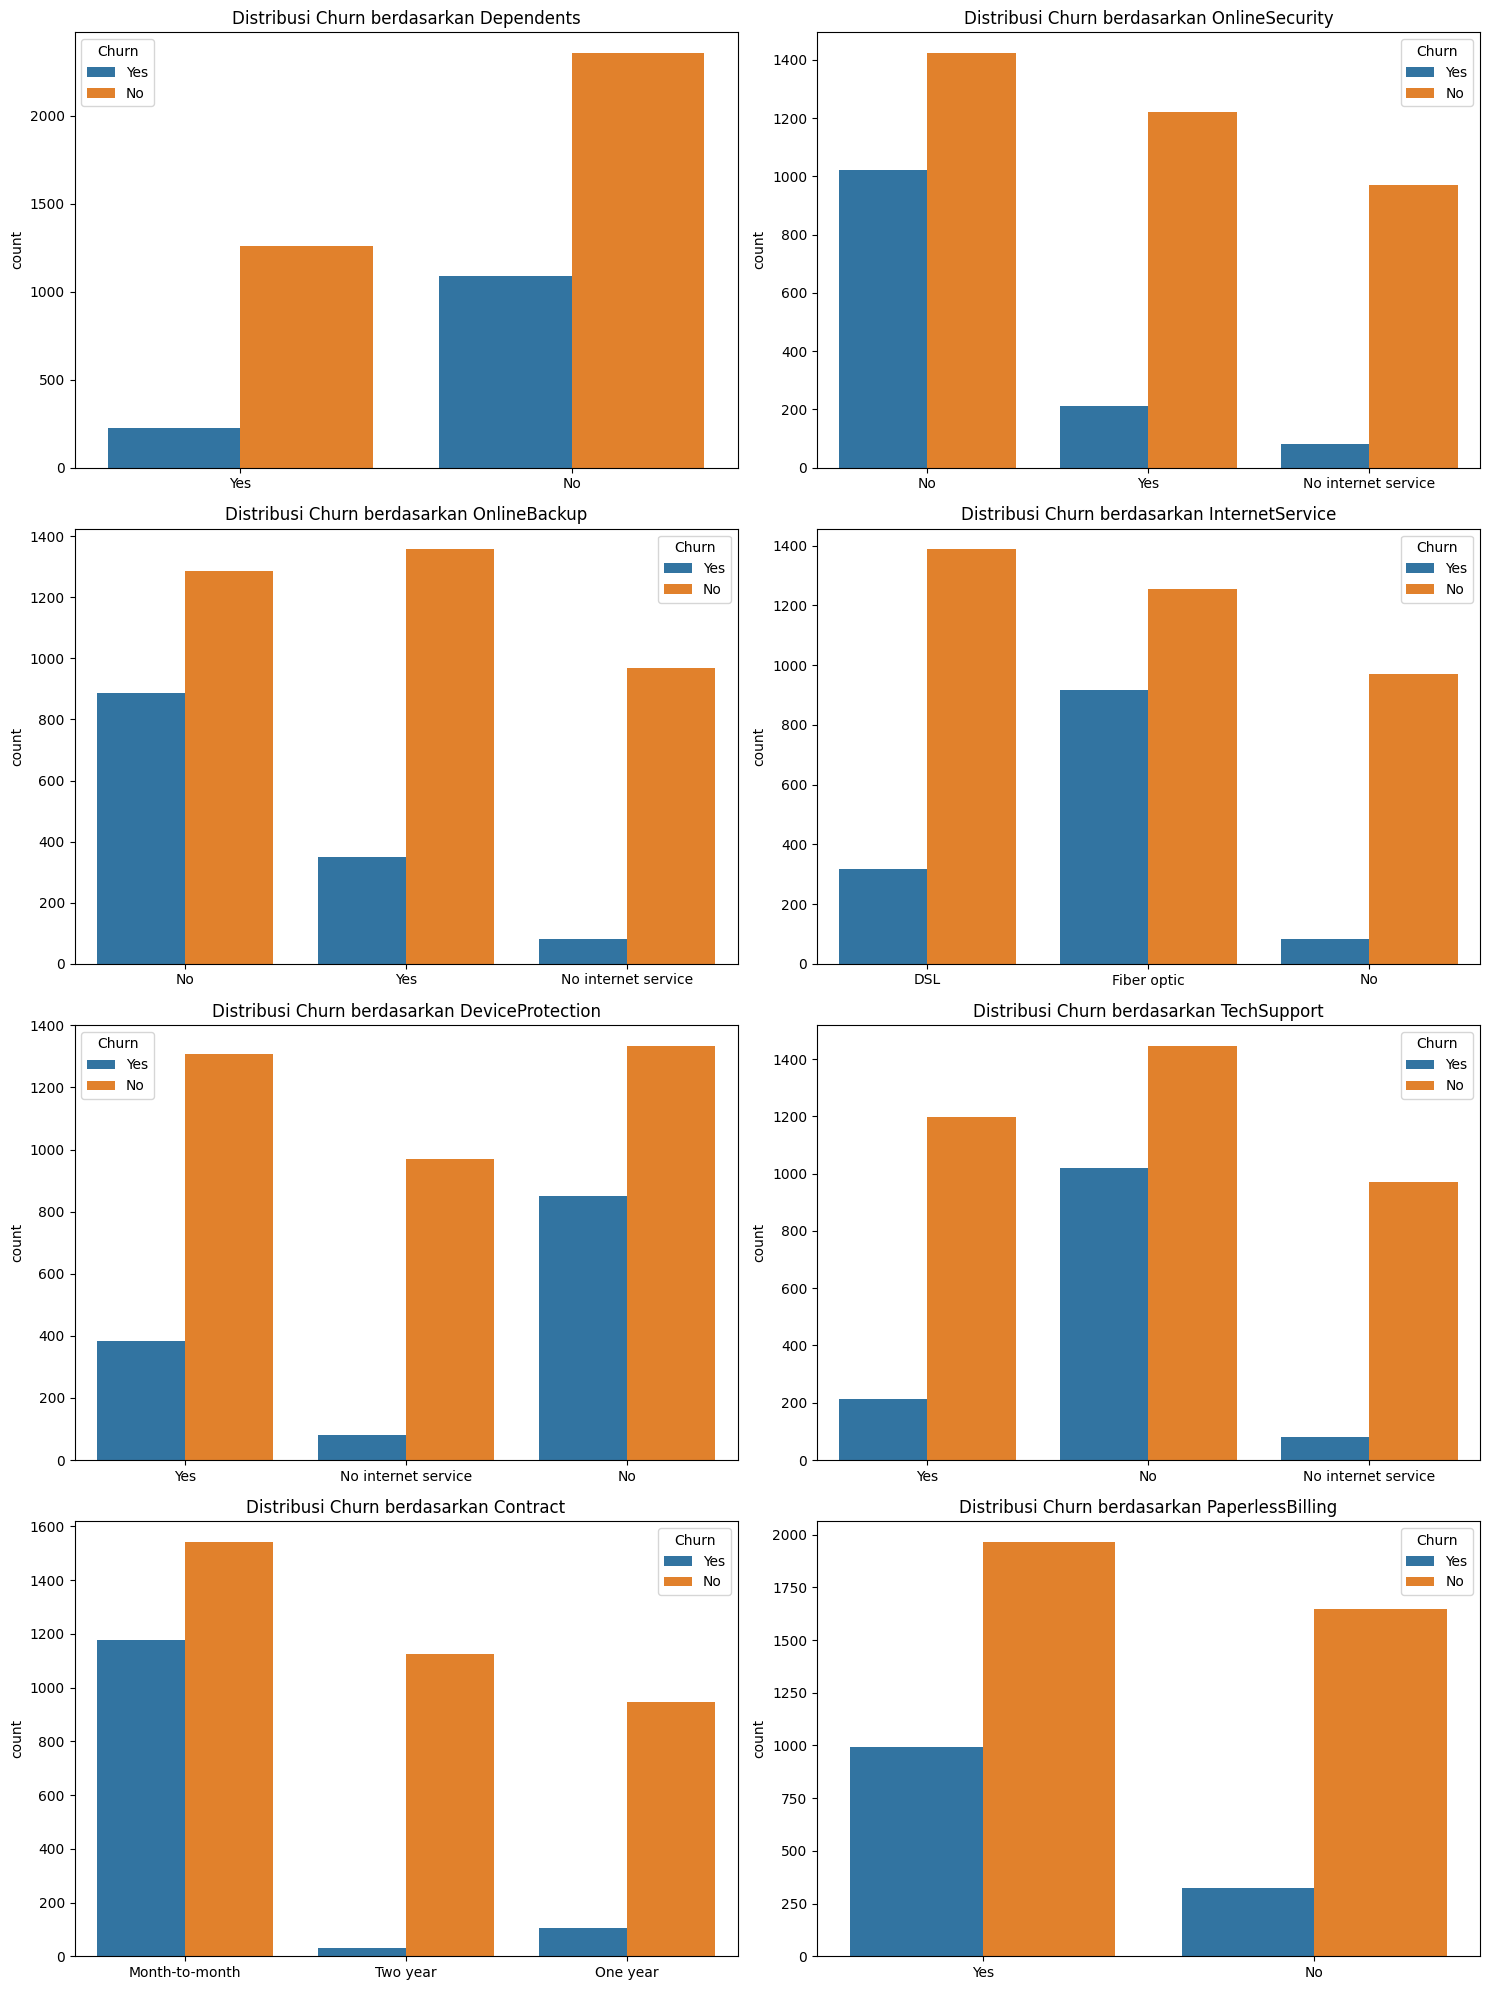

In [ ]:
# Daftar kolom kategorikal
categorical_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Membuat figure dan axes untuk 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten() # Meratakan array axes agar mudah di-loop

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi Churn berdasarkan {col}')
    axes[i].set_xlabel('') # Kosongkan label x agar tidak berantakan

plt.tight_layout()
plt.show()

Grafik batang dengan selisih tinggi paling jauh antara churn=yes dengan churn=no adalah yang perlu diperhatikan, karena disitulah faktor penentu yang paling signifikan terkait keputusan pelanggan untuk churn atau tidak.

Seperti yang disebutkan sebelumnya, fitur **Contract** terlihat berpengaruh. Di beberapa fitur yang terdapat pilihan untuk **No Internet Service**, selalu memiliki tingkat no churn yang tinggi.

Fitur **OnlineSecurity** dan **OnlineBackup** menunjukkan pola yang mirip, dimana yang menggunakan kedua layanan itu memiliki tingkat churn yang rendah.

Di fitur **DeviceProtection** dan **TechSupport**, terlihat bahwa pelanggan yang menggunakan kedua layanan tersebut memiliki level no churn yang tinggi, walaupun pelanggan yang tidak menggunakan kedua layanan itu juga punya nilai no churn yang tinggi, nilai churn-nya lebih tinggi dibanding pelanggan dengan kedua layanan tersebut.

Berikut ini adalah grafik 100% stacked bar chart untuk fitur **Contract** untuk melihat bahwa persentase no churn terkecil ada di pelanggan kontrak yang panjang.

Churn                 No       Yes
Contract                          
Month-to-month  0.567071  0.432929
One year        0.899240  0.100760
Two year        0.972342  0.027658


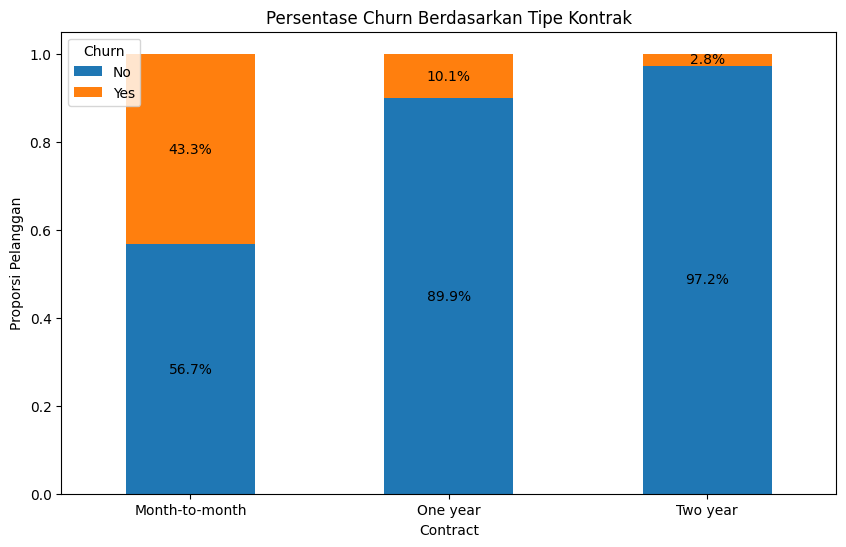

In [ ]:
contract_churn_rate = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(contract_churn_rate)

ax = contract_churn_rate.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Persentase Churn Berdasarkan Tipe Kontrak')
plt.ylabel('Proporsi Pelanggan')
plt.xticks(rotation=0)

# Menambahkan label persentase pada setiap segmen
for c in ax.containers:
    labels = [f'{w*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

Berikutnya akan ditinjau data numerical yang ada, yaitu **tenure** dan **MonthlyCharges**. Untuk melihat distribusi data numerical secara sederhana, dapat digunakan histogram. Tenure adalah masa berlangganan pelanggan sehingga mestinya punya hubungan kuat dengan churn rate. Data ini termasuk ke data diskrit. Untuk mengetahui distribusi tenure di antara 2 grup churn (yes & no), maka secara sederhana dapat digunakan box plot.

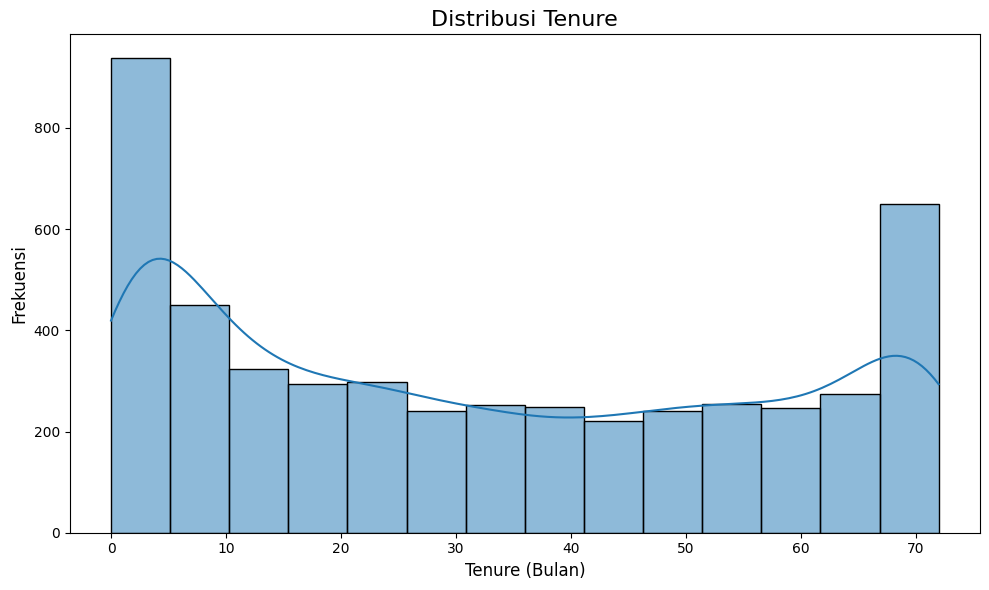

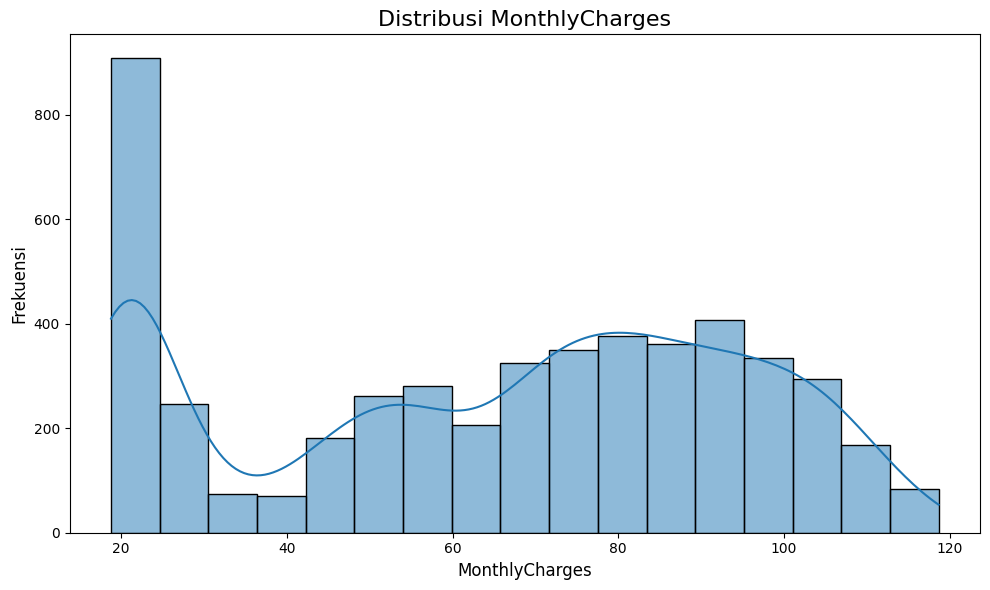

In [ ]:
# Visualisasi distribusi tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', kde=True)
plt.title('Distribusi Tenure', fontsize=16)
plt.xlabel('Tenure (Bulan)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

# Visualisasi distribusi MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Distribusi MonthlyCharges', fontsize=16)
plt.xlabel('MonthlyCharges', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

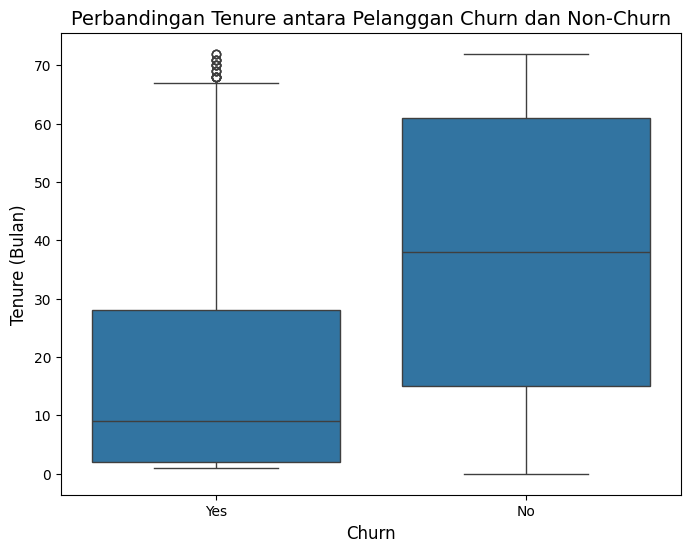

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Perbandingan Tenure antara Pelanggan Churn dan Non-Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (Bulan)', fontsize=12)
plt.show()

Dari box plot tersebut, dapat dilihat untuk kotak yes churn berada di posisi yang lebih rendah dibanding no churn, artinya pelanggan churn memiliki tenure (masa berlangganan) yang lebih rendah. Ada beberapa outliers di grup yes churn dimana pelanggan dengan tenure panjang berhenti berlangganan.

Berikutnya ditinjau fitur **MonthlyCharges**, dimana ini adalah data continuous harga dengan rentang yang panjang sehingga bisa lebih informatif bila diketahui kepadatan distribusinya dalam bentuk violin plot.

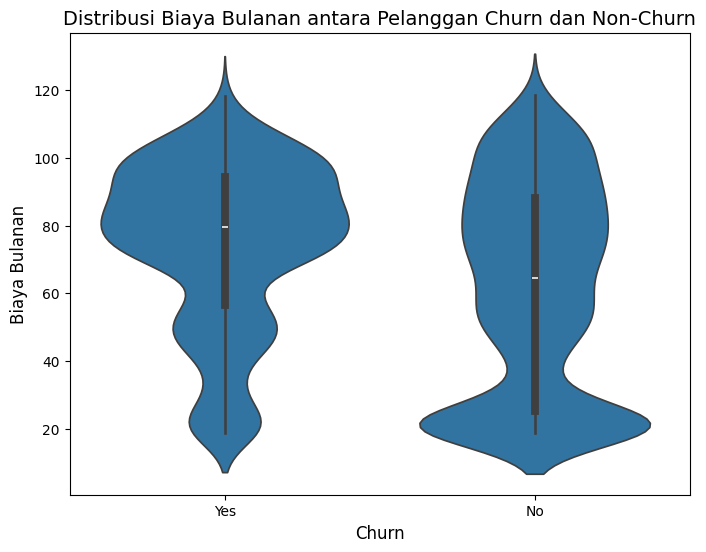

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribusi Biaya Bulanan antara Pelanggan Churn dan Non-Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Biaya Bulanan', fontsize=12)
plt.show()

Dari grafik tersebut ditunjukkan bahwa distribusi **MonthlyCharges** untuk pelanggan yang `Churn='Yes'` cenderung lebih terkonsentrasi di angka yang lebih tinggi. Ini menandakan pelanggan dengan tagihan bulanan yang mahal lebih mungkin untuk berhenti.

Dari sekian insight yang ada, dapat diambil pola untuk hubungan data categoricals dengan numericals. Dapat diduga bahwa pelanggan dengan **Contract** tipe Month-to-Month dengan **MonthlyCharges** yang tinggi memiliki kemungkinan churn yang tinggi. Jadi dapat dibentuk grafik box plot **MonthlyCharges** untuk grup **Churn**, dikelompokkan berdasarkan tipe **Contract**.

Selain itu, untuk pelanggan dengan **OnlineSecurity** berdasarkan bar plot sebelumnya, memiliki tingkat churn yang relatif rendah, diduga ada hubungannya dengan **MonthlyCharges** karena pelanggan yang membayar mahal tanpa mendapat layanan keamanan, mungkin melakukan churn. Jadi dapat dibentuk grafik box plot **MonthlyCharges** untuk grup **Churn**, dikelompokkan berdasarkan kategori layanan **OnlineSecurity**.

Visualisasi ini dapat dilakukan dengan `sns.catplot`

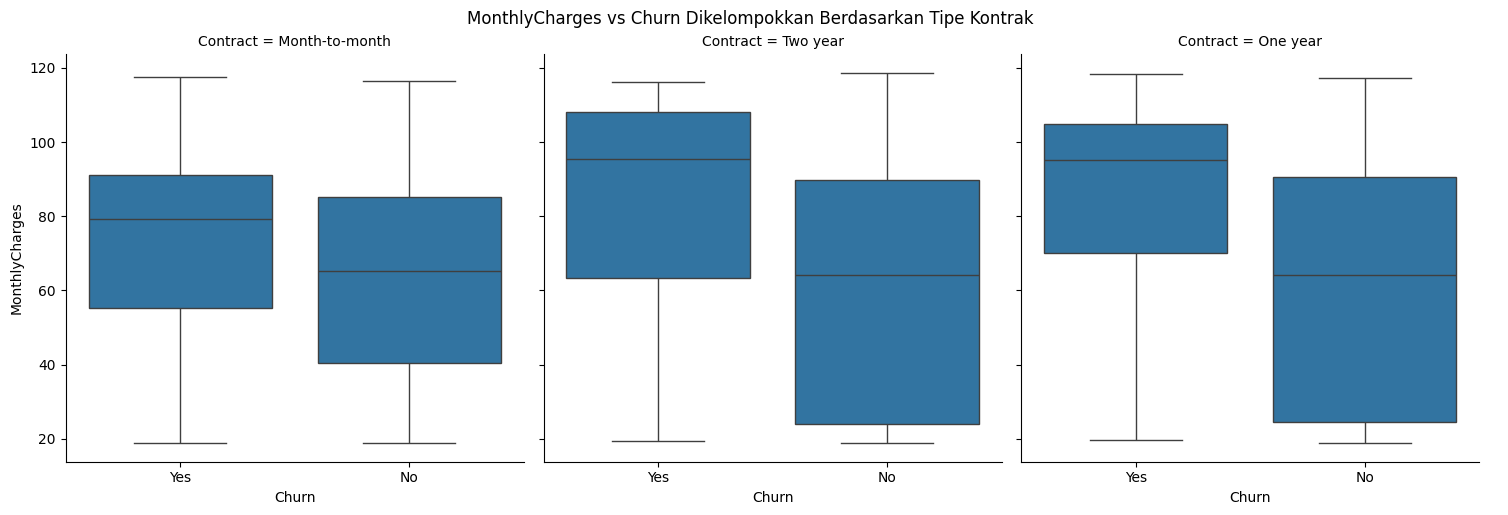

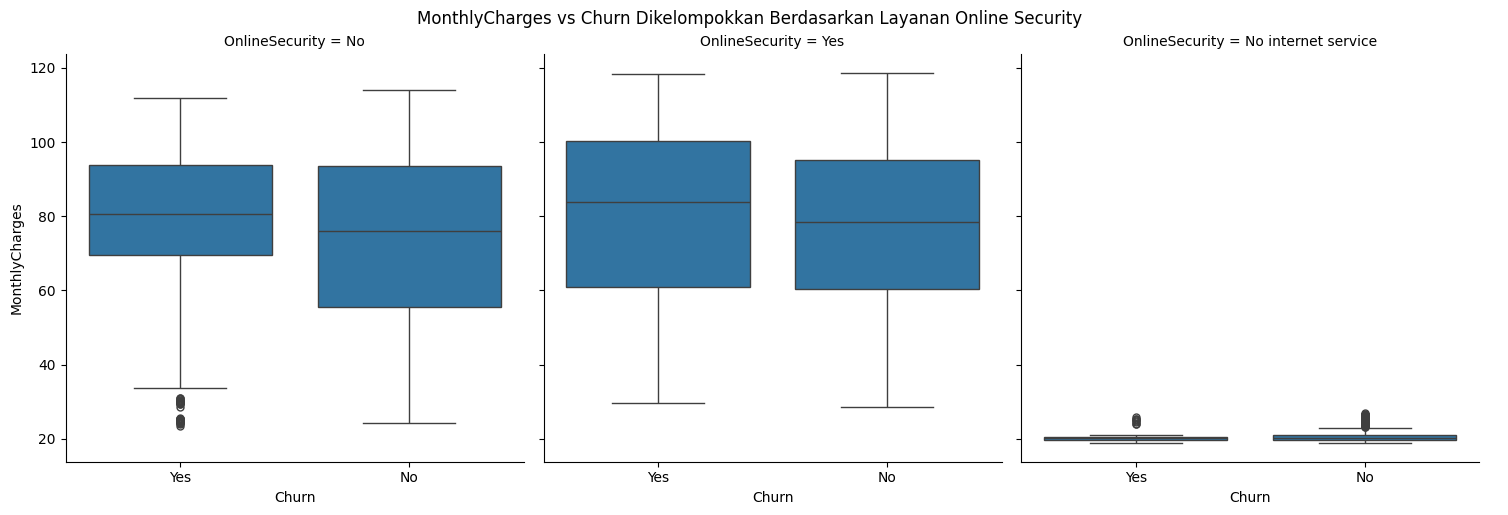

In [ ]:
# Membandingkan distribusi MonthlyCharges vs Churn, dipisahkan berdasarkan Tipe Kontrak
sns.catplot(data=df, x='Churn', y='MonthlyCharges', col='Contract', kind='box')
plt.suptitle('MonthlyCharges vs Churn Dikelompokkan Berdasarkan Tipe Kontrak', y=1.02)
plt.show()

# Membandingkan distribusi MonthlyCharges vs Churn, dipisahkan berdasarkan OnlineSecurity
sns.catplot(data=df, x='Churn', y='MonthlyCharges', col='OnlineSecurity', kind='box')
plt.suptitle('MonthlyCharges vs Churn Dikelompokkan Berdasarkan Layanan Online Security', y=1.02)
plt.show()

Rupanya dugaan awalnya tidak sepenuhnya tepat, dimana berdasarkan **Contract**, pelanggan bulanan tidak ada yang dikenakan harga terlalu tinggi, di rentang 40-90 dan pelanggan yes & no churn tidak berbeda jauh. Perbedaan yang lebih jelas ada di tipe kontrak 1 dan 2 tahunan, dimana dalam kontrak selama itu, **MonthlyCharges** yang tinggi membuat pelanggan mudah churn.

Dugaan awal untuk tipe layanan **OnlineSecurity** juga sepertinya tidak sepenuhnya terbukti dengan data, dimana pelanggan dengan atau tanpa layanan keamanan online, dikenakan biaya bulanan yang relatif mirip, dan profil yes atau no churn-nya juga tidak berbeda jauh. Hal unik berikutnya adalah untuk pelanggan dengan No Internet Service rupanya dikenakan biaya bulanan yang minim, dengan profil yes/no churn yang mirip.  

## **5. Data Cleaning**

Data cleaning penting untuk memastikan data yang ada akurat dan kosisten. Disinilah dilakukan perbaikan kesalahan, penanganan anomali, dan validasi data. Seperti yang telah dibahas sebelumnya, terdapat beberapa hal yang dirasa perlu untuk diperbaiki, yaitu missing values dan duplikat.

Ditemukan beberapa baris data dengan tenure = 0. Setelah diperiksa, semua baris ini memiliki tipe Contract 'One year' atau 'Two year'. Asumsinya, ini adalah pelanggan yang baru saja mendaftar untuk kontrak jangka panjang dan datanya tercatat sebelum bulan pertama mereka selesai. Oleh karena itu, data ini dianggap valid dan tidak akan dihapus.

Kemudian dari pengecekan data categoricals, di fitur **InternetService** ada grup No, dimana akan lebih konsisten bila diganti nama grupnya seperti dengan yang ada di fitur-fitur lain, yaitu No Internet Service.

Selain masalah tersebut, data ini sudah konsisten dan siap untuk tahapan berikutnya.

In [ ]:
# Pembuatan copy dari dataset
df_clean = df.copy()

# Pengecekan value counts untuk seluruh fitur categoricals
for col in df_clean.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:")
    print(df_clean[col].value_counts())
    print("\n")


Value counts for Dependents:
Dependents
No     3446
Yes    1484
Name: count, dtype: int64


Value counts for OnlineSecurity:
OnlineSecurity
No                     2445
Yes                    1433
No internet service    1052
Name: count, dtype: int64


Value counts for OnlineBackup:
OnlineBackup
No                     2172
Yes                    1706
No internet service    1052
Name: count, dtype: int64


Value counts for InternetService:
InternetService
Fiber optic    2172
DSL            1706
No             1052
Name: count, dtype: int64


Value counts for DeviceProtection:
DeviceProtection
No                     2186
Yes                    1692
No internet service    1052
Name: count, dtype: int64


Value counts for TechSupport:
TechSupport
No                     2467
Yes                    1411
No internet service    1052
Name: count, dtype: int64


Value counts for Contract:
Contract
Month-to-month    2721
Two year          1157
One year          1052
Name: count, dtype: int64


Val

In [ ]:
df_clean['InternetService'].value_counts()

,count
InternetService,
Fiber optic,2172
DSL,1706
No,1052


In [ ]:
# Penggantian nilai 'No' menjadi 'No Internet Service' di fitur InternetService agar konsisten
df_clean['InternetService'] = df_clean['InternetService'].replace('No', 'No Internet Service')

print("\nSetelah penggantian nilai 'No' menjadi 'No Internet Service' di fitur InternetService:")
print(df_clean['InternetService'].value_counts())


Setelah penggantian nilai 'No' menjadi 'No Internet Service' di fitur InternetService:
InternetService
Fiber optic            2172
DSL                    1706
No Internet Service    1052
Name: count, dtype: int64


In [ ]:
df_clean['InternetService'].value_counts()

,count
InternetService,
Fiber optic,2172
DSL,1706
No Internet Service,1052


Dari sini dapat dilihat untuk tiap pelanggan yang No Internet Service, seperti apa profilnya untuk layanan lainnya, yaitu dalam hal **Dependents**, **Contract**, **PaperlessBilling**, dan juga dengan profil **Churn**-nya.

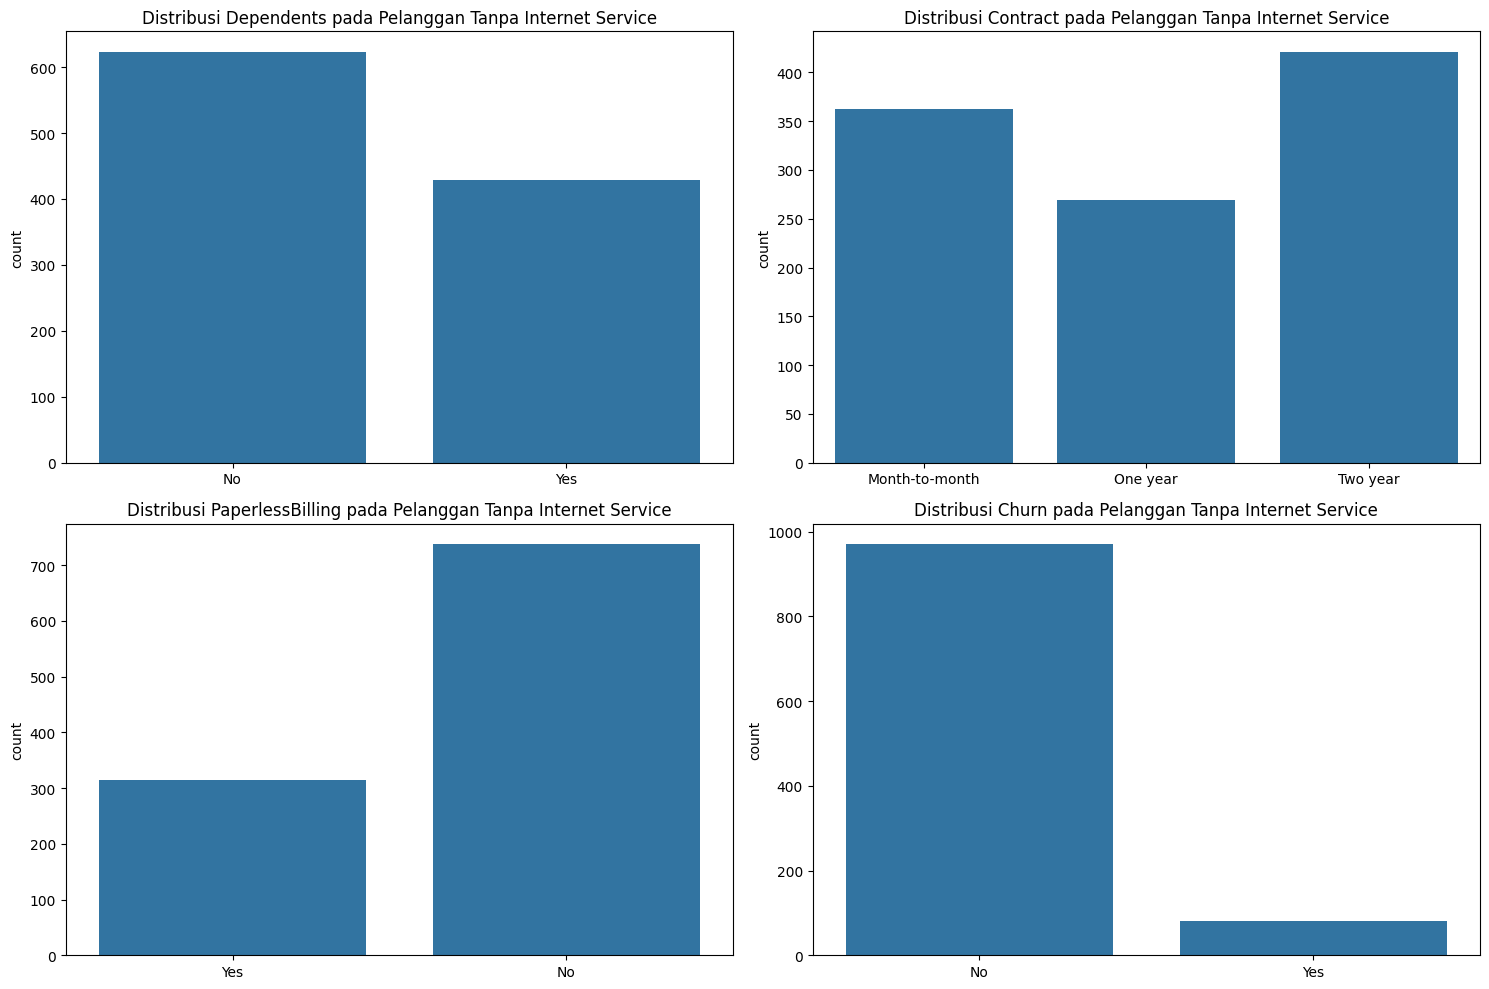

In [ ]:
# Filter DataFrame untuk pelanggan dengan 'No Internet Service'
no_internet_df = df_clean[df_clean['InternetService'] == 'No Internet Service']

# Daftar kolom kategorikal yang diminta
categorical_cols_subset = ['Dependents', 'Contract', 'PaperlessBilling', 'Churn']

# Membuat figure dan axes untuk subplot
n_cols = 2
n_rows = (len(categorical_cols_subset) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Membuat countplot untuk setiap kolom kategorikal
for i, col in enumerate(categorical_cols_subset):
    sns.countplot(x=col, data=no_internet_df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col} pada Pelanggan Tanpa Internet Service')
    axes[i].set_xlabel('')


plt.tight_layout()
plt.show()

Bisa dilihat bahwa pelanggan tanpa Internet Service mayoritas tanpa Dependents, kontrak panjang, tanpa PaperlessBilling (billing manual), dan yang terpenting, memiliki churn rate yang rendah.

## **6. Feature Engineering & Feature Selection**

Di bab ini, data mentah akan diubah menjadi format yang optimal untuk machine learning dan menciptakan sinyal-sinyal baru yang dapat membantu model dalam membuat prediksi yang lebih akurat.

### 6.1. Encoding Fitur Categorical

Disini akan dilakukan langkah penting dimana semua kolom `object` akan diubah menjadi angka. Untuk fitur biner, akan digunakan `LabelEncoder`. Untuk fitur multi-kategori, digunakan One-Hot Encoding dengan `pd.get_dummies`.

In [ ]:
# Langkah 1: Buat salinan dari data bersih
df_fe = df_clean.copy()

# Langkah 2: Lakukan Ordinal Encoding Manual untuk fitur 'Contract'
# Definisikan urutan dari komitmen terendah ke tertinggi
contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

# Terapkan mapping ke kolom Contract
df_fe['Contract'] = df_fe['Contract'].map(contract_mapping)
print("Kolom 'Contract' setelah Ordinal Encoding:")
print(df_fe[['Contract']].head())


# Langkah 3: Lanjutkan encoding untuk kolom-kolom lainnya
# Encoding fitur biner (Yes/No) dan target (Churn)
binary_cols = ['Dependents', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if df_fe[col].dtype == 'object':
        le = LabelEncoder()
        df_fe[col] = le.fit_transform(df_fe[col])

# One-Hot Encoding untuk fitur multi-kategori sisanya
multi_cat_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport']
df_fe = pd.get_dummies(df_fe, columns=multi_cat_cols, drop_first=True)


# Tampilkan hasil akhir untuk verifikasi
print("\nInformasi tabel setelah encoding:")
df_fe.info()
print("Ukuran tabel setelah encoding:")
print(df_fe.shape)
print("Data setelah encoding:")
df_fe.head()

Kolom 'Contract' setelah Ordinal Encoding:
   Contract
0         0
1         0
2         2
3         2
4         0

Informasi tabel setelah encoding REVISI:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Dependents                            4930 non-null   int64  
 1   tenure                                4930 non-null   int64  
 2   Contract                              4930 non-null   int64  
 3   PaperlessBilling                      4930 non-null   int64  
 4   MonthlyCharges                        4930 non-null   float64
 5   Churn                                 4930 non-null   int64  
 6   InternetService_Fiber optic           4930 non-null   bool   
 7   InternetService_No Internet Service   4930 non-null   bool   
 8   OnlineSecurity_No internet service    4930 non-null   bool   

,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No Internet Service,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1,9,0,1,72.90,1,False,False,False,False,False,False,False,True,False,True
1,0,14,0,1,82.65,0,True,False,False,False,False,True,False,True,False,False
2,0,64,2,0,47.85,1,False,False,False,True,False,False,False,True,False,True
3,0,72,2,0,69.65,0,False,False,False,True,False,True,False,True,False,True
4,0,3,0,1,23.60,0,False,True,True,False,True,False,True,False,True,False


Dapat dilihat bahwa dengan `drop_first=True` di One-Hot Encoding, dapat mengurangi masalah multikolinearitas yang dapat terjadi ketika satu fitur di dataset bisa diprediksi secara sempurna dari satu atau lebih fitur lainnya sehingga *redundant*.

Misal digunakan **Contract** sebagai contoh. Sekarang ada 2 kolom: Contract_One year dan Contract_Two year. Model akan membacanya seperti ini:
- Jika Contract_One year = True, maka jenis kontraknya adalah "One year".
- Jika Contract_Two year = True, maka jenis kontraknya adalah "Two year".
- Jika kedua kolom tersebut bernilai False, maka model tahu bahwa jenis kontraknya pasti adalah kategori yang dihapus, yaitu "Month-to-month".

### 6.2. Membuat Fitur Baru (Feature Creation)

A. Binning **tenure**

Mengelompokkan tenure bisa membantu model menangkap pola non-linear. Disini akan dibagi menjadi 3 kategori:


1.   Pelanggan Baru: 0-12 Bulan
2.   Pelanggan Setia: 13-48 Bulan
3.   Pelanggan Jangka Panjang: >48 Bulan

Seperti yang dipaparkan di bab sebelumnya, hubungan antara tenure dan churn mungkin tidak linear. Pelanggan yang sangat baru mungkin berisiko tinggi, pelanggan setia berisiko rendah, dan pelanggan yang sangat lama mungkin risikonya naik lagi (misalnya karena teknologi usang). Binning membantu model menangkap pola ini.





In [ ]:
# Membuat kategori untuk tenure
bins = [0, 12, 48, 73] # Tenure 0 bulan akan masuk ke grup pertama
labels = ['Pelanggan Baru', 'Pelanggan Setia', 'Pelanggan Jangka Panjang']
df_fe['TenureGroup'] = pd.cut(df_fe['tenure'], bins=bins, labels=labels, right=False)

# Lakukan One-Hot Encoding untuk TenureGroup
df_fe = pd.get_dummies(df_fe, columns=['TenureGroup'], drop_first=True)

print("Ukuran tabel setelah binning tenure:")
print(df_fe.shape)

print("Kolom baru setelah binning tenure:")
df_fe.head()

Ukuran tabel setelah binning tenure:
(4930, 18)
Kolom baru setelah binning tenure:


,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No Internet Service,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,TenureGroup_Pelanggan Setia,TenureGroup_Pelanggan Jangka Panjang
0,1,9,0,1,72.90,1,False,False,False,False,False,False,False,True,False,True,False,False
1,0,14,0,1,82.65,0,True,False,False,False,False,True,False,True,False,False,True,False
2,0,64,2,0,47.85,1,False,False,False,True,False,False,False,True,False,True,False,True
3,0,72,2,0,69.65,0,False,False,False,True,False,True,False,True,False,True,False,True
4,0,3,0,1,23.60,0,False,True,True,False,True,False,True,False,True,False,False,False


B. Menghitung Jumlah Layanan Tambahan

Pelanggan yang memiliki banyak layanan tambahan, menunjukkan keterikatan yang lebih kuat sehingga kemungkinan untuk pindah ke provider lain bisa jadi lebih kecil.

In [ ]:
# Kolom layanan tambahan (setelah encoding 'Yes' menjadi 1)
# Periksa kembali nama kolom setelah one-hot encoding
service_cols = ['OnlineSecurity_Yes', 'OnlineBackup_Yes',
                'DeviceProtection_Yes', 'TechSupport_Yes']

df_fe['JumlahLayanan'] = df_fe[service_cols].sum(axis=1)
print("Ukuran tabel setelah menambah JumlahLayanan:")
print(df_fe.shape)
df_fe.info()
print("Data setelah menambah JumlahLayanan:")
df_fe.head()

Ukuran tabel setelah menambah JumlahLayanan:
(4930, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Dependents                            4930 non-null   int64  
 1   tenure                                4930 non-null   int64  
 2   Contract                              4930 non-null   int64  
 3   PaperlessBilling                      4930 non-null   int64  
 4   MonthlyCharges                        4930 non-null   float64
 5   Churn                                 4930 non-null   int64  
 6   InternetService_Fiber optic           4930 non-null   bool   
 7   InternetService_No Internet Service   4930 non-null   bool   
 8   OnlineSecurity_No internet service    4930 non-null   bool   
 9   OnlineSecurity_Yes                    4930 non-null   bool   
 10  OnlineBackup_No internet ser

,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No Internet Service,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,TenureGroup_Pelanggan Setia,TenureGroup_Pelanggan Jangka Panjang,JumlahLayanan
0,1,9,0,1,72.90,1,False,False,False,False,False,False,False,True,False,True,False,False,2
1,0,14,0,1,82.65,0,True,False,False,False,False,True,False,True,False,False,True,False,2
2,0,64,2,0,47.85,1,False,False,False,True,False,False,False,True,False,True,False,True,3
3,0,72,2,0,69.65,0,False,False,False,True,False,True,False,True,False,True,False,True,4
4,0,3,0,1,23.60,0,False,True,True,False,True,False,True,False,True,False,False,False,0


C. Fitur Interaksi: Menggabungkan Sinyal Resiko

Dari paparan bab sebelumnya, diketahui bahwa pelanggan dengan tipe kontrak Month-to-month memiliki tingkat churn yang tinggi. Selain itu, pelanggan dengan tenure rendah juga memliki tingkat churn yang tinggi. Fitur baru yang mendefinisikan pelanggan yang memiliki 2 profil tersebut dapat membantu model untuk membaca polanya.

In [ ]:
# Membuat fitur interaksi untuk 'Pelanggan Baru dengan Kontrak Bulanan'
# Menggunakan kolom 'Contract' yang sudah di-encode (0 = Month-to-month)
# 'Pelanggan Baru' direpresentasikan ketika kedua kolom one-hot encoding tenure group bernilai False
df_fe['New_MonthToMonth_Risk'] = (df_fe['Contract'] == 0) & (~df_fe['TenureGroup_Pelanggan Setia']) & (~df_fe['TenureGroup_Pelanggan Jangka Panjang'])
df_fe['New_MonthToMonth_Risk'] = df_fe['New_MonthToMonth_Risk'].astype(int)
print("Ukuran tabel setelah menambah New_MonthToMonth_Risk:")
print(df_fe.shape)
print("Data setelah menambah New_MonthToMonth_Risk:")
df_fe.head()

Ukuran tabel setelah menambah New_MonthToMonth_Risk:
(4930, 20)
Data setelah menambah New_MonthToMonth_Risk:


,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No Internet Service,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,TenureGroup_Pelanggan Setia,TenureGroup_Pelanggan Jangka Panjang,JumlahLayanan,New_MonthToMonth_Risk
0,1,9,0,1,72.90,1,False,False,False,False,False,False,False,True,False,True,False,False,2,1
1,0,14,0,1,82.65,0,True,False,False,False,False,True,False,True,False,False,True,False,2,0
2,0,64,2,0,47.85,1,False,False,False,True,False,False,False,True,False,True,False,True,3,0
3,0,72,2,0,69.65,0,False,False,False,True,False,True,False,True,False,True,False,True,4,0
4,0,3,0,1,23.60,0,False,True,True,False,True,False,True,False,True,False,False,False,0,1


D. Fitur Rasio: Mencari "Value for Money"

Apakah pelanggan yang membayar mahal untuk sedikit layanan lebih mungkin churn?

In [ ]:
# Membuat fitur rasio Biaya per Layanan
# Tambahkan 1 untuk menghindari pembagian dengan nol jika pelanggan tidak punya layanan tambahan
df_fe['BiayaPerLayanan'] = df_fe['MonthlyCharges'] / (df_fe['JumlahLayanan'] + 1)
print("Ukuran tabel setelah menambah BiayaPerLayanan:")
print(df_fe.shape)
print("Data setelah menambah BiayaPerLayanan:")
df_fe.head()

Ukuran tabel setelah menambah BiayaPerLayanan:
(4930, 21)
Data setelah menambah BiayaPerLayanan:


,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No Internet Service,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,TenureGroup_Pelanggan Setia,TenureGroup_Pelanggan Jangka Panjang,JumlahLayanan,New_MonthToMonth_Risk,BiayaPerLayanan
0,1,9,0,1,72.90,1,False,False,False,False,...,False,False,True,False,True,False,False,2,1,24.3000
1,0,14,0,1,82.65,0,True,False,False,False,...,True,False,True,False,False,True,False,2,0,27.5500
2,0,64,2,0,47.85,1,False,False,False,True,...,False,False,True,False,True,False,True,3,0,11.9625
3,0,72,2,0,69.65,0,False,False,False,True,...,True,False,True,False,True,False,True,4,0,13.9300
4,0,3,0,1,23.60,0,False,True,True,False,...,False,True,False,True,False,False,False,0,1,23.6000


E. Fitur Profil Risiko

Berdasarkan Exploratory Data Analysis (EDA), beberapa karakteristik pelanggan secara konsisten menunjukkan tingkat churn yang lebih tinggi. Daripada membiarkan model mempelajari hubungan ini secara terpisah, akan diciptakan sebuah fitur baru bernama ProfilRisiko. Fitur ini akan memberikan skor berdasarkan jumlah faktor risiko yang dimiliki seorang pelanggan. Hipotesisnya adalah, semakin tinggi skor risikonya, semakin tinggi pula kemungkinan pelanggan tersebut untuk churn.

In [ ]:
# df_fe adalah DataFrame setelah encoding
# Asumsi 'Contract' = 0 jika Month-to-month
# Asumsi 'OnlineSecurity_Yes' = True jika punya layanan, False jika tidak.
# Asumsi 'TenureGroup_Pelanggan Setia' & 'TenureGroup_Pelanggan Jangka Panjang' adalah one-hot encoding

# Inisialisasi skor risiko
df_fe['ProfilRisiko'] = 0

# Tambah 1 poin untuk setiap faktor risiko
# Risiko 1: Kontrak bulanan (paling berisiko)
df_fe.loc[df_fe['Contract'] == 0, 'ProfilRisiko'] += 1

# Risiko 2: Tidak memiliki Online Security
# Kolom 'OnlineSecurity_Yes' bernilai False jika pelanggan tidak punya layanan ini
df_fe.loc[df_fe['OnlineSecurity_Yes'] == False, 'ProfilRisiko'] += 1

# Risiko 3: Pelanggan baru (kurang dari setahun)
# Direpresentasikan ketika TenureGroup_Pelanggan Setia dan TenureGroup_Pelanggan Jangka Panjang bernilai False
df_fe.loc[(df_fe['TenureGroup_Pelanggan Setia'] == False) & (df_fe['TenureGroup_Pelanggan Jangka Panjang'] == False), 'ProfilRisiko'] += 1


# Tampilkan hasilnya
print("Contoh skor ProfilRisiko:")
display(df_fe[['Contract', 'OnlineSecurity_Yes', 'TenureGroup_Pelanggan Setia', 'TenureGroup_Pelanggan Jangka Panjang', 'ProfilRisiko']].head())

print("\nDistribusi Skor Risiko:")
print(df_fe['ProfilRisiko'].value_counts())

Contoh skor ProfilRisiko:


,Contract,OnlineSecurity_Yes,TenureGroup_Pelanggan Setia,TenureGroup_Pelanggan Jangka Panjang,ProfilRisiko
0,0,False,False,False,3
1,0,False,True,False,2
2,2,True,False,True,0
3,2,True,False,True,0
4,0,False,False,False,3



Distribusi Skor Risiko:
ProfilRisiko
1    1572
2    1297
3    1168
0     893
Name: count, dtype: int64


F. Nilai Finansial Pelanggan

Fitur **tenure** dan **MonthlyCharges** adalah prediktor penting. Untuk menangkap nilai historis seorang pelanggan dalam satu metrik, akan dibuat fitur **EstimatedTotalCharges** dengan mengalikan **tenure** dengan **MonthlyCharges**. Fitur ini merepresentasikan total pendapatan yang telah dihasilkan oleh pelanggan selama masa berlangganan mereka. Untuk pelanggan dengan tenure = 0, akan dianggap tenure = 1 dalam perhitungan ini agar nilainya tidak nol.

In [ ]:
# Menangani kasus tenure = 0 agar tidak menghasilkan total charges 0
temp_tenure = df_fe['tenure'].replace(0, 1)

# Membuat fitur EstimatedTotalCharges
df_fe['EstimatedTotalCharges'] = temp_tenure * df_fe['MonthlyCharges']

print("Contoh EstimatedTotalCharges:")
print(df_fe[['tenure', 'MonthlyCharges', 'EstimatedTotalCharges']].head())

print("\nUkuran tabel setelah menambah EstimatedTotalCharges:")
print(df_fe.shape)

Contoh EstimatedTotalCharges:
   tenure  MonthlyCharges  EstimatedTotalCharges
0       9           72.90                  656.1
1      14           82.65                 1157.1
2      64           47.85                 3062.4
3      72           69.65                 5014.8
4       3           23.60                   70.8

Ukuran tabel setelah menambah EstimatedTotalCharges:
(4930, 23)


### 6.3. Feature Selection

Setelah membuat banyak fitur, penting untuk memilih yang terbaik agar model tidak "bingung" oleh fitur yang tidak relevan.

Cara terbaik adalah dengan melatih model dasar (seperti Random Forest) pada semua fitur yang ada, lalu melihat fitur mana yang dianggap paling penting oleh model tersebut.

Fitur Paling Penting Menurut Random Forest:
                        feature  importance
20        EstimatedTotalCharges    0.229806
18              BiayaPerLayanan    0.217372
3                MonthlyCharges    0.199947
1                      Contract    0.062952
19                 ProfilRisiko    0.060646
4   InternetService_Fiber optic    0.033434
17        New_MonthToMonth_Risk    0.031140
2              PaperlessBilling    0.024614
16                JumlahLayanan    0.021583
0                    Dependents    0.021104


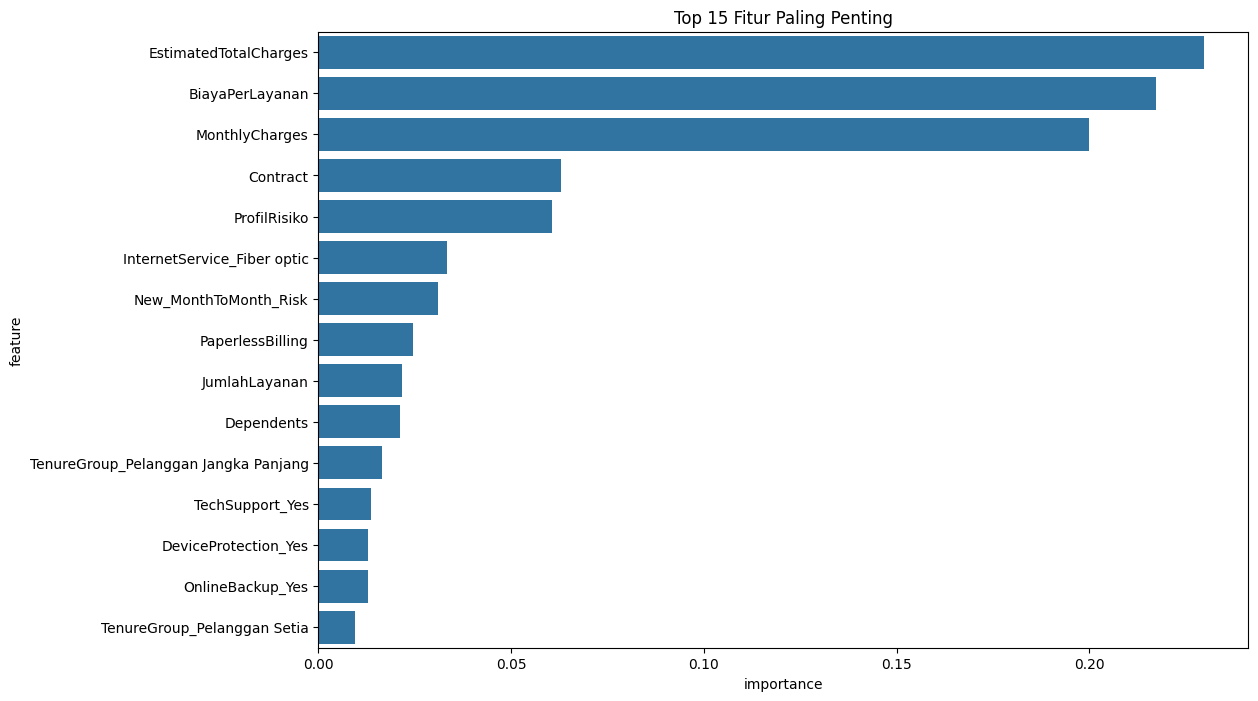

In [ ]:
# Pisahkan fitur (X) dan target (y)
# Hapus kolom tenure asli karena sudah diwakili oleh TenureGroup
X = df_fe.drop(['Churn', 'tenure'], axis=1)
y = df_fe['Churn']

# Latih model Random Forest sementara
model_selector = RandomForestClassifier(n_estimators=100, random_state=42)
model_selector.fit(X, y)

# Buat DataFrame untuk Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("Fitur Paling Penting Menurut Random Forest:")
print(feature_importance.head(10))

# Visualisasikan
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Fitur Paling Penting')
plt.show()

Feature engineering & creation telah menunjukkan hasil yang cukup baik, dimana berhasil dideteksi sinyal churn paling kuat ada di 3 fitur baru yang berkaitan dengan finansial (**EstimatedTotalCharges**, **BiayaPerLayanan**, **MonthlyCharges**). Ini memberi informasi bahwa keputusan churn sangat dipengaruhi oleh berapa banyak uang yang dikeluarkan pelanggan relatif terhadap masa berlangganan mereka.

Fitur **Contract** dan **ProfilRisiko** (yang salah satu komponennya adalah kontrak) berada di 5 besar. Ini mengonfirmasi bahwa tingkat komitmen pelanggan adalah prediktor utama kedua setelah faktor finansial.

Sebelum lanjut ke tahap berikutnya, perlu diperiksa ketiga fitur teratas yang kemungkinan memiliki korelasi sangat tinggi, menggunakan ketiga fitur tersebut secara bersamaan menjadi *redundant* sehingga menimbulkan masalah multikolinearitas pada beberapa model.

Oleh karena itu, perlu diperiksa korelasi antara 3 fitur teratas, bila korelasinya sangat tinggi (misal di atas 0.8) maka fitur tersebut bisa dihilangkan agar model menjadi lebih efisien.

In [ ]:
# Cek korelasi antara 3 fitur teratas
print(df_fe[['EstimatedTotalCharges', 'BiayaPerLayanan', 'MonthlyCharges']].corr())

                       EstimatedTotalCharges  BiayaPerLayanan  MonthlyCharges
EstimatedTotalCharges               1.000000        -0.122729        0.645608
BiayaPerLayanan                    -0.122729         1.000000        0.385311
MonthlyCharges                      0.645608         0.385311        1.000000


Hasil pengecekan korelasi sudah cukup baik, dimana nilai korelasi tidak terlalu tinggi, fitur-fitur tersebut berhubungan tapi tidak sama (tidak redundant), mereka masih memberikan informasi yang sedikit berbeda kepada model.

Dengan ini, pencarian fitur dirasa sudah cukup, karena kemungkinan sinyal utama (finansial, tenure) sudah berhasil diidentifikasi, dan pencarian fitur lebih lanjut hanya akan memberikan peningkatan performa kecil walau dengan usaha yang banyak. Pemilihan fitur dilakukan dengan mengambil fitur-fitur yang secara kumulatif menyumbang 95% dari total kepentingan. Setelah dipilih fiturnya, berikutnya masuk ke tahap modeling & evaluation.

In [ ]:
# Hitung kepentingan kumulatif
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

print("\nTabel Feature Importance")
print(feature_importance)

# Tentukan batas (misalnya, 95% dari total kepentingan)
CUTOFF = 0.95
selected_features_df = feature_importance[feature_importance['cumulative_importance'] <= CUTOFF]

# Ambil daftar nama fiturnya
selected_features = selected_features_df['feature'].tolist()

print(f"Jumlah fitur awal: {len(X.columns)}")
print(f"Jumlah fitur terpilih yang menyumbang {CUTOFF*100}% kepentingan: {len(selected_features)}")
print("\nFitur-fitur terpilih:")
print(selected_features)



# Simpan daftar fitur ini untuk digunakan pada tahap pemodelan
X_selected = X[selected_features]


Tabel Feature Importance
                                 feature  importance  cumulative_importance
20                 EstimatedTotalCharges    0.229806               0.229806
18                       BiayaPerLayanan    0.217372               0.447178
3                         MonthlyCharges    0.199947               0.647125
1                               Contract    0.062952               0.710076
19                          ProfilRisiko    0.060646               0.770722
4            InternetService_Fiber optic    0.033434               0.804156
17                 New_MonthToMonth_Risk    0.031140               0.835296
2                       PaperlessBilling    0.024614               0.859911
16                         JumlahLayanan    0.021583               0.881493
0                             Dependents    0.021104               0.902597
15  TenureGroup_Pelanggan Jangka Panjang    0.016527               0.919125
13                       TechSupport_Yes    0.013586          

## **7. Modeling & Evaluation**

Di tahap ini, akan digunakan fitur-fitur yang telah disiapkan untuk melatih beberapa model machine learning. Tujuannya adalah membandingkan performa mereka dan memilih model terbaik yang paling sesuai dengan masalah bisnis perusahaan.


### 7.1. Persiapan Data (Split & Scale)

Sebelum melatih model, ada dua langkah persiapan krusial:

1. Splitting: Membagi data menjadi data latih (training set) untuk melatih model, dan data uji (testing set) untuk menguji seberapa baik performa model pada data yang belum pernah dilihat sebelumnya.

2. Scaling: Menyamakan skala fitur-fitur numerik agar tidak ada fitur yang mendominasi hanya karena rentang nilainya lebih besar.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X_selected adalah DataFrame berisi fitur-fitur pilihan dari bab sebelumnya
# y adalah target variable (Churn)

# 1. Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # Penting untuk masalah klasifikasi agar proporsi target sama
)

# 2. Scaling fitur numerik
# Tentukan kolom mana yang numerik (selain yang sudah 0/1 dari encoding)
numerical_cols = ['EstimatedTotalCharges', 'BiayaPerLayanan', 'MonthlyCharges', 'JumlahLayanan']

scaler = StandardScaler()

# Fit scaler HANYA pada data training
scaler.fit(X_train[numerical_cols])

# Transform data training dan testing
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data siap untuk pemodelan.")
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Data siap untuk pemodelan.
Ukuran X_train: (3944, 13)
Ukuran X_test: (986, 13)


### 7.2. Pelatihan Beberapa Model

Akan dilatih beberapa model klasifikasi populer untuk melihat mana yang memberikan hasil terbaik untuk dataset yang ada.

In [ ]:
# Import model tambahan
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model-model yang akan digunakan
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Latih setiap model dan simpan hasilnya
results = {}

for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Lakukan prediksi pada data test
    y_pred = model.predict(X_test)

    # Simpan skor performa
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    }

    print(f"{name} selesai dilatih.")

Logistic Regression selesai dilatih.
Random Forest selesai dilatih.
XGBoost selesai dilatih.
Support Vector Machine selesai dilatih.
K-Nearest Neighbors selesai dilatih.
Naive Bayes selesai dilatih.


### 7.3. Evaluasi Model

Sekarang bagian terpenting. Seperti yang telah ditetapkan di awal, tujuan bisnis ini adalah mengidentifikasi sebanyak mungkin pelanggan yang akan churn agar tim retensi bisa bertindak. Oleh karena itu, metrik utamanya adalah Recall.

- Recall tinggi berarti: Model sangat baik dalam menemukan pelanggan yang benar-benar akan churn. (Meminimalkan False Negative).

- Precision tinggi berarti: Dari semua yang diprediksi akan churn, sebagian besar memang benar churn. (Meminimalkan False Positive).

Untuk bisnis ini, lebih baik kita "mengganggu" beberapa pelanggan setia (biaya rendah) daripada kehilangan pelanggan yang akan churn (biaya tinggi). Jadi, Recall adalah prioritas.

In [ ]:
# Tampilkan classification report untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- Laporan Klasifikasi untuk {name} ---")
    print(classification_report(y_test, y_pred))
    print("="*60)

--- Laporan Klasifikasi untuk Logistic Regression ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       723
           1       0.67      0.52      0.59       263

    accuracy                           0.80       986
   macro avg       0.75      0.72      0.73       986
weighted avg       0.79      0.80      0.80       986

--- Laporan Klasifikasi untuk Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       723
           1       0.60      0.44      0.51       263

    accuracy                           0.77       986
   macro avg       0.71      0.67      0.68       986
weighted avg       0.76      0.77      0.76       986

--- Laporan Klasifikasi untuk XGBoost ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       723
           1       0.62      0.51      0.56       263

    accuracy                          

### 7.4. Perbandingan Model

Untuk mempermudah perbandingan, ditampilkan hasil dari semua model dalam satu tabel (1, akan churn).

In [ ]:
# Ubah dictionary hasil menjadi DataFrame
results_df = pd.DataFrame(results).T.sort_values(by='recall', ascending=False)

print("--- Perbandingan Performa Model ---")
print(results_df)

--- Perbandingan Performa Model ---
                        accuracy  precision    recall  f1_score
Naive Bayes             0.752535   0.523691  0.798479  0.632530
Logistic Regression     0.804260   0.669903  0.524715  0.588486
XGBoost                 0.786004   0.619266  0.513308  0.561331
K-Nearest Neighbors     0.766734   0.573333  0.490494  0.528689
Random Forest           0.772819   0.600000  0.444867  0.510917
Support Vector Machine  0.793103   0.668571  0.444867  0.534247


Hasil ini sudah cukup baik sebagai baseline (titik awal), dan ada satu temuan yang sangat menarik dan penting:

- Naive Bayes Unggul di Metrik Utama (Recall): Model Naive Bayes memberikan hasil Recall yang tinggi (0.798), jauh mengungguli model-model lain. Sesuai dengan tujuan bisnis untuk "menangkap" sebanyak mungkin pelanggan yang akan churn, model ini adalah pemenangnya untuk saat ini.

- Trade-off dengan Precision: "Harga" yang harus dibayar untuk Recall yang tinggi adalah Precision yang rendah (0.523). Artinya, dari semua pelanggan yang ditandai akan churn oleh Naive Bayes, hanya sekitar 52% yang benar-benar churn. Model ini cukup "agresif" dan menghasilkan banyak False Positive.

- Model Lain Lebih "Aman": Model seperti Logistic Regression dan Support Vector Machine memiliki Precision yang lebih tinggi (mereka lebih akurat saat menebak 'Yes'), tetapi mereka "melewatkan" lebih dari setengah pelanggan yang sebenarnya akan churn (Recall hanya 0.52 dan 0.44). Untuk tujuan bisnis telco ini, hal ini kurang ideal.

Kesimpulan Awal: Berdasarkan hasil ini, Naive Bayes adalah kandidat terbaik. Namun perlu diperiksa untuk model lainnya apabila dilakukan hyperparameter tuning, mungkin bisa memberikan hasil yang lebih baik.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Tentukan model yang akan di-tuning
rf_model = RandomForestClassifier(random_state=42)

# 2. Buat daftar hyperparameter yang ingin diuji
# Ini adalah beberapa parameter yang paling umum untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],       # Jumlah pohon dalam forest
    'max_depth': [None, 10, 20, 30],           # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],           # Jumlah minimum sampel untuk memecah node
    'min_samples_leaf': [1, 2, 4],             # Jumlah minimum sampel di daun
    'bootstrap': [True, False]
}

# 3. Inisialisasi RandomizedSearchCV
# Kita memberitahunya untuk mencari kombinasi terbaik berdasarkan skor 'recall'
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,                                # Jumlah kombinasi yang akan dicoba
    cv=5,                                     # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,                                # Gunakan semua core CPU
    scoring='recall'                          # METRIK UTAMA KITA!
)

# 4. Latih pencarian
print("Memulai Hyperparameter Tuning untuk Random Forest...")
random_search.fit(X_train, y_train)

# 5. Tampilkan parameter terbaik yang ditemukan
print("\nParameter terbaik yang ditemukan:")
print(random_search.best_params_)

# 6. Evaluasi model terbaik pada data test
best_rf_model = random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\n--- Laporan Klasifikasi untuk Tuned Random Forest ---")
print(classification_report(y_test, y_pred_tuned))

Memulai Hyperparameter Tuning untuk Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Parameter terbaik yang ditemukan:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}

--- Laporan Klasifikasi untuk Tuned Random Forest ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       723
           1       0.65      0.49      0.56       263

    accuracy                           0.80       986
   macro avg       0.74      0.70      0.71       986
weighted avg       0.78      0.80      0.79       986



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Dapatkan laporan klasifikasi untuk model Random Forest sebelum tuning
untuned_rf_report = classification_report(y_test, models['Random Forest'].predict(X_test), output_dict=True)

# Dapatkan laporan klasifikasi untuk model Random Forest setelah tuning
tuned_rf_report = classification_report(y_test, best_rf_model.predict(X_test), output_dict=True)

# Ekstrak metrik untuk kelas '1' (Churn=Yes)
untuned_metrics = untuned_rf_report['1']
tuned_metrics = tuned_rf_report['1']

# Ekstrak metrik keseluruhan (accuracy)
untuned_accuracy = untuned_rf_report['accuracy']
tuned_accuracy = tuned_rf_report['accuracy']


# Buat DataFrame perbandingan
comparison_data = {
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy (Overall)'],
    'Untuned RF': [untuned_metrics['precision'], untuned_metrics['recall'], untuned_metrics['f1-score'], untuned_accuracy],
    'Tuned RF': [tuned_metrics['precision'], tuned_metrics['recall'], tuned_metrics['f1-score'], tuned_accuracy]
}

comparison_df = pd.DataFrame(comparison_data)

# Hitung selisih
comparison_df['Difference'] = comparison_df['Tuned RF'] - comparison_df['Untuned RF']

print("Perbandingan Performa Random Forest Sebelum dan Sesudah Tuning (Kelas Churn=Yes):")
display(comparison_df)

Perbandingan Performa Random Forest Sebelum dan Sesudah Tuning (Kelas Churn=Yes):


,Metric,Untuned RF,Tuned RF,Difference
0,Precision (Class 1),0.600000,0.653266,0.053266
1,Recall (Class 1),0.444867,0.494297,0.049430
2,F1-Score (Class 1),0.510917,0.562771,0.051854
3,Accuracy (Overall),0.772819,0.795132,0.022312


Setelah dicoba untuk dilakukan hyperparameter tuning model Random Forest dengan metode Random Search, hasilnya nilai recall tidak meningkat signifikan. Berikutnya akan dicoba untuk hyperparameter tuning xgboost dengan metode Random Search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# 1. Tentukan model yang akan di-tuning
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Buat daftar hyperparameter yang ingin diuji untuk XGBoost
# Ini adalah beberapa parameter yang paling umum untuk XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.005, 0.01, 0.05], # L1 regularization
    'reg_lambda': [0, 0.005, 0.01, 0.05] # L2 regularization
}

# 3. Inisialisasi RandomizedSearchCV
# Kita memberitahunya untuk mencari kombinasi terbaik berdasarkan skor 'recall'
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,                                # Jumlah kombinasi yang akan dicoba
    cv=5,                                     # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,                                # Gunakan semua core CPU
    scoring='recall'                          # METRIK UTAMA KITA!
)

# 4. Latih pencarian
print("Memulai Hyperparameter Tuning untuk XGBoost...")
random_search.fit(X_train, y_train)

# 5. Tampilkan parameter terbaik yang ditemukan
print("\nParameter terbaik yang ditemukan:")
print(random_search.best_params_)

# 6. Evaluasi model terbaik pada data test
best_xgb_model = random_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test)

print("\n--- Laporan Klasifikasi untuk Tuned XGBoost ---")
print(classification_report(y_test, y_pred_tuned))

Memulai Hyperparameter Tuning untuk XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Parameter terbaik yang ditemukan:
{'subsample': 0.8, 'reg_lambda': 0.01, 'reg_alpha': 0.005, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

--- Laporan Klasifikasi untuk Tuned XGBoost ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       723
           1       0.62      0.51      0.56       263

    accuracy                           0.79       986
   macro avg       0.73      0.70      0.71       986
weighted avg       0.78      0.79      0.78       986



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Dapatkan laporan klasifikasi untuk model XGBoost sebelum tuning
untuned_xgb_report = classification_report(y_test, models['XGBoost'].predict(X_test), output_dict=True)

# Dapatkan laporan klasifikasi untuk model XGBoost setelah tuning
tuned_xgb_report = classification_report(y_test, best_xgb_model.predict(X_test), output_dict=True)

# Ekstrak metrik untuk kelas '1' (Churn=Yes)
untuned_metrics_xgb = untuned_xgb_report['1']
tuned_metrics_xgb = tuned_xgb_report['1']

# Ekstrak metrik keseluruhan (accuracy)
untuned_accuracy_xgb = untuned_xgb_report['accuracy']
tuned_accuracy_xgb = tuned_xgb_report['accuracy']


# Buat DataFrame perbandingan
comparison_data_xgb = {
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy (Overall)'],
    'Untuned XGBoost': [untuned_metrics_xgb['precision'], untuned_metrics_xgb['recall'], untuned_metrics_xgb['f1-score'], untuned_accuracy_xgb],
    'Tuned XGBoost': [tuned_metrics_xgb['precision'], tuned_metrics_xgb['recall'], tuned_metrics_xgb['f1-score'], tuned_accuracy_xgb]
}

comparison_df_xgb = pd.DataFrame(comparison_data_xgb)

# Hitung selisih
comparison_df_xgb['Difference'] = comparison_df_xgb['Tuned XGBoost'] - comparison_df_xgb['Untuned XGBoost']

print("Perbandingan Performa XGBoost Sebelum dan Sesudah Tuning (Kelas Churn=Yes):")
display(comparison_df_xgb)

Perbandingan Performa XGBoost Sebelum dan Sesudah Tuning (Kelas Churn=Yes):


,Metric,Untuned XGBoost,Tuned XGBoost,Difference
0,Precision (Class 1),0.619266,0.622120,0.002854
1,Recall (Class 1),0.513308,0.513308,0.000000
2,F1-Score (Class 1),0.561331,0.562500,0.001169
3,Accuracy (Overall),0.786004,0.787018,0.001014


Hasil tuning XGBoost menunjukkan perbedaan performa yang lebih kecil dibanding perbedaan performa random forest, sebelum dan sesudah tuning. Hal ini bisa terjadi kemungkinan karena memang performa dari algoritma ini sudah di tahap maksimumnya, dan setelan default dari XGBoost sudah cukup optimal untuk struktur data ini.

Setelah model-model paling potensial (random forest dan xgboost) sudah dicoba dituning, hasilnya adalah model-model kompleks tersebut tidak dapat mengalahkan performa recall dari model yang lebih sederhana untuk kasus ini.

Dengan ini eksperimen pemodelan dicukupkan, dan lanjut ke analisis evaluasi yang lebih mendalam untuk tiap model yang ada.

2 metric lain yang belum dihitung adalah ROC AUC dan PR AUC (PR Score) (Area Under the Precision-Recall Curve). Kedua metrik tersebut dapat memberikan gambaran yang lebih lengkap, terutama pada data yang tidak seimbang dalam kasus seperti churn ini.
- ROC AUC Score: Mengukur seberapa baik model secara umum dalam membedakan antara kelas positif (Churn) dan negatif (Non-Churn). Nilai mendekati 1 sangat baik.
- PR AUC (PR Score): Lebih fokus pada performa model terhadap kelas minoritas (kelas Churn). Ini sangat relevan untuk masalah bisnis telco ini.

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Loop melalui setiap model yang sudah dilatih
for name, model in models.items():
    # Dapatkan probabilitas prediksi untuk kelas positif (Churn=1)
    # Beberapa model seperti SVC butuh penanganan khusus
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else: # Untuk SVC dengan probability=False
        y_pred_proba = model.decision_function(X_test)

    # Hitung ROC AUC
    results[name]['roc_auc'] = roc_auc_score(y_test, y_pred_proba)

    # Hitung Precision-Recall Curve dan AUC-nya
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
    results[name]['pr_auc'] = auc(recall_vals, precision_vals)

# Buat DataFrame perbandingan final dari dictionary results
final_comparison_df = pd.DataFrame(results).T.sort_values(by='recall', ascending=False)

print("--- Tabel Perbandingan Performa Model Final ---")
print(final_comparison_df)

--- Tabel Perbandingan Performa Model Final ---
                        accuracy  precision    recall  f1_score   roc_auc  \
Naive Bayes             0.752535   0.523691  0.798479  0.632530  0.844643   
Logistic Regression     0.804260   0.669903  0.524715  0.588486  0.857691   
XGBoost                 0.786004   0.619266  0.513308  0.561331  0.827988   
K-Nearest Neighbors     0.766734   0.573333  0.490494  0.528689  0.791606   
Random Forest           0.772819   0.600000  0.444867  0.510917  0.825489   
Support Vector Machine  0.793103   0.668571  0.444867  0.534247  0.792279   

                          pr_auc  
Naive Bayes             0.648809  
Logistic Regression     0.678427  
XGBoost                 0.606295  
K-Nearest Neighbors     0.582834  
Random Forest           0.612967  
Support Vector Machine  0.654254  


### 7.5. Analisis Mendalam Hasil Evaluasi & Pemilihan Model Final

Setelah melatih dan mengevaluasi enam model klasifikasi yang berbeda, tahap ini berfokus pada analisis komparatif untuk memilih satu model final yang paling efektif dalam menyelesaikan masalah bisnis yang telah didefinisikan.

#### **Penjelasan Metrik Evaluasi**

Untuk memahami performa setiap model secara holistik, beberapa metrik evaluasi digunakan. Setiap metrik memberikan perspektif yang berbeda terhadap kinerja model, yang relevan dengan aspek bisnis yang berbeda pula.

* **Accuracy**: Mengukur persentase prediksi yang benar secara keseluruhan (baik *churn* maupun non-*churn*) dari total data. Metrik ini memberikan gambaran umum, namun bisa menyesatkan pada dataset yang tidak seimbang.
* **Precision**: Menjawab pertanyaan, "Dari semua pelanggan yang diprediksi akan *churn*, berapa persen yang benar-benar *churn*?"  Metrik ini penting untuk mengukur efisiensi kampanye retensi; *precision* yang tinggi berarti lebih sedikit sumber daya yang terbuang untuk pelanggan yang sebenarnya tidak berisiko.
* **Recall (Sensitivity)**: Menjawab pertanyaan, "Dari semua pelanggan yang **sebenarnya akan churn**, berapa persen yang berhasil diidentifikasi oleh model?"  Metrik ini sangat krusial untuk mengukur efektivitas model dalam mencegah kehilangan pelanggan. *Recall* yang tinggi berarti lebih sedikit pelanggan berisiko yang terlewatkan.
* **F1-Score**: Rata-rata harmonik dari *Precision* dan *Recall*. Metrik ini berguna untuk mencari keseimbangan antara kedua metrik tersebut.
* **ROC AUC**: Mengukur kemampuan model secara keseluruhan untuk membedakan antara kelas pelanggan *churn* dan non-*churn*. Skor mendekati 1 menunjukkan model memiliki daya pembeda yang sangat baik.
* **PR AUC (PR Score)**: Mirip dengan ROC AUC, namun lebih informatif pada dataset yang tidak seimbang. Metrik ini mengukur kemampuan model dalam menjaga *Precision* yang tinggi seiring dengan meningkatnya *Recall*.

#### **Analisis Perbandingan Antar Model**

Tabel perbandingan menunjukkan variasi performa yang signifikan di antara model-model yang diuji.

* **Model Paling Seimbang**: Model seperti **Logistic Regression** menunjukkan performa yang paling seimbang di berbagai metrik. Model ini meraih skor `accuracy` tertinggi (0.804), `roc_auc` tertinggi (0.857), dan `pr_auc` tertinggi (0.678). Ini menunjukkan bahwa Logistic Regression adalah model yang paling andal secara umum dalam membedakan kedua kelas. Namun, skor `recall`-nya (0.524) tergolong moderat, yang berarti model ini masih melewatkan hampir setengah dari pelanggan yang sebenarnya akan *churn*.

* **Model Paling Unggul untuk Tujuan Bisnis**: Meskipun memiliki `accuracy` terendah (0.752), model **Naive Bayes** menunjukkan performa **Recall yang luar biasa tinggi (0.798)**, jauh melampaui semua model lainnya. Ini berarti Naive Bayes berhasil mengidentifikasi hampir **80%** dari total pelanggan yang berisiko *churn*, menjadikannya alat yang paling efektif untuk tujuan utama bisnis ini.

Hasil ini menyoroti *trade-off* fundamental antara *Precision* dan *Recall*. Naive Bayes, dengan *Recall* tertinggi, adalah model yang paling "agresif" dalam mendeteksi potensi *churn*. Konsekuensinya adalah *Precision* yang lebih rendah (0.523), yang berarti ada sejumlah pelanggan non-*churn* yang akan salah diklasifikasikan sebagai *churn* (*False Positive*).

#### **Pemilihan Model Final**

Berdasarkan tujuan bisnis yang telah didefinisikan di awal—yaitu untuk meminimalkan kehilangan pelanggan dengan mengidentifikasi sebanyak mungkin individu yang berisiko—maka metrik yang menjadi prioritas utama adalah **Recall**.  Biaya dari kehilangan seorang pelanggan (*False Negative*) dianggap jauh lebih tinggi daripada biaya memberikan penawaran retensi kepada pelanggan yang sebenarnya tidak akan *churn* (*False Positive*).

Oleh karena itu, dengan justifikasi yang kuat berdasarkan tujuan bisnis, **Naive Bayes dipilih sebagai model final** untuk proyek ini.

#### **Model Limitation**

Meskipun terpilih sebagai model terbaik untuk tugas ini, penting untuk memahami batasan dari model Naive Bayes yang akan digunakan.

* **Kapan Model Dapat Dipercaya**: Model ini paling dapat dipercaya untuk fungsi utamanya: **menghasilkan daftar prospek pelanggan yang perlu dihubungi oleh tim retensi**. Dengan *recall* 80%, tim dapat yakin bahwa sebagian besar pelanggan yang benar-benar berisiko ada di dalam daftar tersebut.
* **Kapan Model Kurang Dapat Dipercaya**: Karena *precision*-nya hanya 52%, model ini **tidak dapat dipercaya untuk membuat keputusan final** atau mengambil tindakan yang merugikan pelanggan. Tim bisnis tidak boleh berasumsi bahwa setiap orang di daftar prediksi akan 100% *churn*. Aksi yang diambil berdasarkan prediksi ini sebaiknya bersifat penawaran proaktif yang berbiaya rendah (seperti diskon atau bonus layanan), bukan tindakan drastis.
* **Batasan Data**: Performa model ini dibatasi oleh fitur yang tersedia. Model ini tidak memiliki akses ke data seperti riwayat interaksi dengan layanan pelanggan, data penggunaan jaringan, atau tingkat kepuasan pelanggan, yang bisa jadi merupakan prediktor *churn* yang lebih kuat. Untuk pengembangan di masa depan, penambahan data-data tersebut sangat direkomendasikan.

**Cara Kerja Algoritma Naive Bayes (Dalam Konteks Prediksi Churn)**

Secara sederhana, algoritma Naive Bayes bekerja seperti seorang "detektif statistik". Ia membuat prediksi berdasarkan probabilitas atau kemungkinan, dengan belajar dari data historis yang sudah ada.

Bayangkan Naive Bayes adalah seorang manajer telekomunikasi berpengalaman yang mencoba menebak apakah seorang pelanggan akan *churn* atau tidak. Berikut adalah tiga langkah yang ia lakukan:

**Langkah 1: Belajar dari Pengalaman (Melihat Data Historis)**

Pertama, model ini "belajar" dengan melihat semua data pelanggan di masa lalu (`X_train` dan `y_train`). Ia akan menghitung dua jenis probabilitas:

* **Probabilitas Awal (*Prior Probability*):** Seberapa umum *churn* itu terjadi?
    * "Dari 1000 pelanggan di masa lalu, 250 *churn* dan 750 tidak. Jadi, probabilitas awal seorang pelanggan akan *churn* adalah 25%."

* **Probabilitas Fitur (*Likelihood*):** Seberapa umum sebuah karakteristik pelanggan muncul pada grup *churn* vs. non-*churn*?
    * "Di antara semua pelanggan yang **churn**, 85% di antaranya memiliki kontrak `Month-to-month`."
    * "Di antara semua pelanggan yang **tidak churn**, hanya 30% yang memiliki kontrak `Month-to-month`."

Model ini melakukan perhitungan seperti itu untuk **setiap fitur** yang dimiliki (`tenure`, `OnlineSecurity`, `Dependents`, dll.), menciptakan sebuah "buku contekan" probabilitas.

**Langkah 2: Membuat Asumsi "Naive" (Asumsi Sederhana)**

Di sinilah bagian "Naive" (lugu/sederhana) dari nama algoritma ini berasal. Model ini membuat satu asumsi besar yang menyederhanakan segalanya:

> **Ia menganggap semua fitur pelanggan tidak saling berhubungan satu sama lain.**

Artinya, model menganggap pilihan `Contract` seorang pelanggan tidak ada hubungannya dengan apakah ia memiliki `OnlineSecurity` atau tidak. Ia melihat setiap fitur sebagai **bukti yang terpisah dan independen**. Dalam dunia nyata, asumsi ini seringkali salah, tetapi penyederhanaan inilah yang membuat Naive Bayes sangat cepat dan efisien.

**Langkah 3: Membuat Prediksi (Menganalisis Pelanggan Baru)**

Sekarang, datanglah seorang pelanggan baru dengan profil sebagai berikut:
* `Contract` = 'Month-to-month'
* `OnlineSecurity` = 'No'
* `tenure` = 5 bulan

Model Naive Bayes akan melakukan "perdebatan" internal:

1.  **Tim "Pro-Churn"** akan mengumpulkan semua bukti yang mendukung pelanggan ini akan *churn*. Ia akan mengambil probabilitas dari "buku contekan"-nya dan mengalikannya:
    * *P(Kontrak Bulanan | Churn) × P(Tanpa Keamanan | Churn) × P(Tenure 5 bulan | Churn) × P(Churn)*

2.  **Tim "Anti-Churn"** akan melakukan hal yang sama untuk bukti yang mendukung pelanggan ini akan tetap setia:
    * *P(Kontrak Bulanan | Tidak Churn) × P(Tanpa Keamanan | Tidak Churn) × P(Tenure 5 bulan | Tidak Churn) × P(Tidak Churn)*

**Keputusan Akhir:** Model kemudian membandingkan skor probabilitas dari kedua "tim". Tim mana yang memiliki skor akhir lebih tinggi, itulah prediksi yang akan diberikan oleh model Naive Bayes.

Meskipun asumsinya sederhana, Naive Bayes bekerja sangat baik di proyek ini karena mampu menangkap sinyal-sinyal probabilitas yang kuat dari setiap fitur secara independen, yang ternyata sudah cukup untuk membuat prediksi *churn* yang sangat efektif, terutama dalam hal **Recall**.

### 7.6.  Simulasi Penggunaan Model dan Estimasi Dampak Bisnis

Di subbab ini, akan dilakukan sebuah simulasi sederhana untuk mengestimasi potensi penghematan biaya yang bisa didapatkan perusahaan dengan mengimplementasikan model prediksi churn Naive Bayes yang telah dipilih.

**Asumsi Bisnis**
Karena kita tidak memiliki data finansial yang sebenarnya, kita perlu membuat beberapa asumsi yang masuk akal sebagai dasar perhitungan:

1. Pendapatan Rata-Rata per Pelanggan: Diasumsikan sama dengan rata-rata MonthlyCharges dari keseluruhan dataset.

2. Biaya Penawaran Retensi: Diasumsikan perusahaan memberikan diskon 25% dari biaya bulanan rata-rata kepada pelanggan yang diprediksi akan churn. Ini adalah biaya untuk mencoba mempertahankan mereka.

3. Tingkat Keberhasilan Retensi: Diasumsikan bahwa dari semua pelanggan yang diberi penawaran, 40% di antaranya berhasil dipertahankan (tidak jadi churn).

In [ ]:
# df_clean adalah DataFrame sebelum ada perubahan apapun (encoding, scaling)
# 1. Hitung pendapatan rata-rata per bulan
avg_monthly_revenue = df_clean['MonthlyCharges'].mean()

# 2. Definisikan biaya penawaran retensi
cost_of_retention_offer = avg_monthly_revenue * 0.15

# 3. Definisikan tingkat keberhasilan retensi
retention_success_rate = 0.60

print(f"Pendapatan Rata-Rata per Bulan: ${avg_monthly_revenue:,.2f}")
print(f"Biaya Penawaran Retensi per Pelanggan: ${cost_of_retention_offer:,.2f}")
print(f"Tingkat Keberhasilan Retensi: {retention_success_rate:.0%}")

Pendapatan Rata-Rata per Bulan: $64.88
Biaya Penawaran Retensi per Pelanggan: $9.73
Tingkat Keberhasilan Retensi: 60%


**Menghitung Hasil Prediksi dari Test Set**

Simulasi ini akan menggunakan hasil prediksi dari model Naive Bayes pada X_test dan y_test.

In [ ]:
# Ambil model Naive Bayes yang sudah dilatih dari dictionary 'models'
final_model = models['Naive Bayes']

# Lakukan prediksi HANYA dengan model final ini pada data test
y_pred_final = final_model.predict(X_test)

# Sekarang, hitung confusion matrix menggunakan hasil prediksi dari model final
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_final).ravel()

print(f"Menggunakan model: Naive Bayes")
print(f"True Positives (Benar Prediksi Churn): {tp}")
print(f"False Positives (Salah Prediksi Churn): {fp}")
print(f"False Negatives (Gagal Prediksi Churn): {fn}")

Menggunakan model: Naive Bayes
True Positives (Benar Prediksi Churn): 210
False Positives (Salah Prediksi Churn): 191
False Negatives (Gagal Prediksi Churn): 53


**Skenario 1: Tanpa Menggunakan Model**

Tanpa model, perusahaan tidak tahu siapa yang akan churn. Semua pelanggan yang sebenarnya akan churn (tp + fn) akan hilang, dan perusahaan kehilangan pendapatan dari mereka.

In [ ]:
# Total pelanggan yang sebenarnya churn di test set
actual_churners = tp + fn

# Total potensi pendapatan yang hilang per bulan
total_potential_loss = actual_churners * avg_monthly_revenue

print(f"Tanpa model, perusahaan berpotensi kehilangan {actual_churners} pelanggan.")
print(f"Estimasi kerugian pendapatan per bulan: ${total_potential_loss:,.2f}")

Tanpa model, perusahaan berpotensi kehilangan 263 pelanggan.
Estimasi kerugian pendapatan per bulan: $17,064.24


**Skenario 2: Dengan Menggunakan Model Naive Bayes**

Dengan model, perusahaan akan memberikan penawaran retensi kepada semua pelanggan yang diprediksi akan churn (tp + fp).

In [ ]:
# --- Perhitungan Dampak ---

# 1. Jumlah penawaran yang harus diberikan (semua yang diprediksi churn)
jumlah_penawaran = tp + fp

# 2. Total biaya untuk kampanye retensi
total_biaya_retensi = jumlah_penawaran * cost_of_retention_offer

# 3. Jumlah pelanggan yang berhasil diselamatkan (dari yang benar diprediksi churn)
jumlah_pelanggan_terselamatkan = int(tp * retention_success_rate)

# 4. Total pendapatan yang berhasil diselamatkan per bulan
total_pendapatan_terselamatkan = jumlah_pelanggan_terselamatkan * avg_monthly_revenue

# 5. Penghematan bersih per bulan
penghematan_bersih = total_pendapatan_terselamatkan - total_biaya_retensi

print(f"Jumlah penawaran retensi yang dikirim: {jumlah_penawaran}")
print(f"Total biaya kampanye retensi: ${total_biaya_retensi:,.2f}")
print(f"Estimasi pelanggan yang berhasil diselamatkan: {jumlah_pelanggan_terselamatkan}")
print(f"Estimasi pendapatan yang diselamatkan per bulan: ${total_pendapatan_terselamatkan:,.2f}")
print("--------------------------------------------------")
print(f"ESTIMASI PENGHEMATAN BERSIH PER BULAN: ${penghematan_bersih:,.2f}")

Jumlah penawaran retensi yang dikirim: 401
Total biaya kampanye retensi: $3,902.71
Estimasi pelanggan yang berhasil diselamatkan: 126
Estimasi pendapatan yang diselamatkan per bulan: $8,175.26
--------------------------------------------------
ESTIMASI PENGHEMATAN BERSIH PER BULAN: $4,272.55


## **8. Kesimpulan dan Rekomendasi**

Bab ini merangkum keseluruhan proses dan temuan dari proyek pembangunan model prediksi *customer churn*. Berdasarkan analisis yang telah dilakukan, disajikan kesimpulan akhir, rekomendasi bisnis yang dapat ditindaklanjuti, serta batasan dari solusi yang dikembangkan.



### 8.1. Kesimpulan

Proyek ini bertujuan untuk mengatasi masalah bisnis vital di industri telekomunikasi, yaitu tingginya tingkat perpindahan pelanggan (*customer churn*). Untuk menjawab tantangan ini, proyek ini berhasil membangun sebuah model *machine learning* yang mampu mengidentifikasi pelanggan yang berpotensi tinggi untuk berhenti berlangganan.

Proses pengembangan model dilakukan secara *end-to-end*, dimulai dari pemahaman masalah bisnis, pembersihan data, hingga *feature engineering* di mana fitur-fitur baru yang informatif seperti `EstimatedTotalCharges` dan `ProfilRisiko` berhasil diciptakan untuk memperkuat sinyal prediksi. Enam algoritma klasifikasi yang berbeda kemudian diuji dan dievaluasi secara sistematis.

Dari keenam model tersebut, **Naive Bayes dipilih sebagai model final**. Keputusan ini didasarkan pada performa **Recall yang paling unggul (0.80)**, yang paling selaras dengan tujuan bisnis untuk dapat mendeteksi sebanyak mungkin pelanggan yang benar-benar akan *churn*.



### 8.2. Rekomendasi Bisnis

Berdasarkan performa model final, direkomendasikan agar perusahaan mengimplementasikan model Naive Bayes ini ke dalam proses bisnisnya sebagai **sistem peringatan dini (*early warning system*)**.

* **Implementasi**: Model dapat diintegrasikan dengan sistem CRM (Customer Relationship Management) untuk secara otomatis menandai pelanggan yang memiliki probabilitas *churn* yang tinggi. Daftar ini kemudian dapat menjadi dasar bagi **Tim Retensi Pelanggan** untuk melakukan intervensi proaktif.

* **Dampak Bisnis yang Terukur**: Untuk mengukur potensi dampak dari solusi ini, sebuah simulasi sederhana dilakukan **berdasarkan beberapa asumsi kasar**. Simulasi menunjukkan bahwa tanpa model, perusahaan berpotensi kehilangan pendapatan sekitar **17,064 USD** per bulan dari sampel data uji. Dengan mengimplementasikan model dan menjalankan kampanye retensi (dengan asumsi keberhasilan 60% dan biaya penawaran 15% dari pendapatan rata-rata), perusahaan diestimasikan dapat memperoleh **penghematan bersih sekitar $4,272.55** per bulan. Hal ini menunjukkan bahwa solusi yang diusulkan tidak hanya valid secara teknis tetapi juga layak secara finansial.



### 8.3. Batasan Proyek dan Pengembangan Selanjutnya

Untuk penggunaan yang bertanggung jawab dan pengembangan di masa depan, penting untuk memahami batasan dari solusi ini.

* **Batasan Model**: Model Naive Bayes yang dipilih memiliki *precision* yang relatif rendah (52%). Ini berarti akan ada sejumlah pelanggan yang salah ditandai sebagai berisiko (*False Positive*). Oleh karena itu, model ini **baik digunakan untuk skrining awal**, namun keputusan akhir untuk memberikan penawaran harus dipertimbangkan dengan bijak untuk menekan biaya kampanye.

* **Batasan Data**: Akurasi model dibatasi oleh fitur yang tersedia. Proyek ini tidak memiliki akses ke data riwayat interaksi pelanggan dengan *customer service*, data penggunaan layanan secara detail, atau data keluhan, yang dapat menjadi prediktor *churn* yang sangat kuat.

* **Pengembangan Selanjutnya**: Untuk meningkatkan solusi ini di masa depan, beberapa langkah dapat diambil:
    1.  **Pengayaan Fitur**: Mengintegrasikan sumber data eksternal seperti data tiket keluhan *customer service* untuk mendapatkan pemahaman yang lebih holistik tentang kepuasan pelanggan.
    2.  **Optimasi Strategi Bisnis**: Melakukan A/B testing pada berbagai jenis penawaran retensi untuk menemukan insentif yang paling efektif dan berbiaya efisien.
    3.  **Penyesuaian *Threshold* Prediksi**: Melakukan analisis lebih lanjut untuk menyesuaikan *probability threshold* (tidak hanya 50%) untuk menemukan titik keseimbangan optimal antara *Precision* dan *Recall* yang memaksimalkan laba atas investasi (ROI) dari kampanye retensi.